<div class="alert alert-block alert-info">
    <h1> Advance Regression (PREDICTING HOUSE PRICES) </h1>
</div>

## Table of Contents

1. [Problem Statement](#section1)
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)<br>
     3.1 [Understanding the Dataset](#section301)<br>
     3.2 [Preprocessing](#section302)<br>
4. [Visualising the Data](#section4)<br>
     4.1 [Visualising Numeric Variables](#section401)<br>
     4.2 [Correlation between Numerical Columns](#section402)<br>
     4.3 [Visualising Categorical Variables](#section403)<br> 
5. [Data Preparation](#section5)<br>
     5.1 [Label Encoding Categorical Features](#section501)<br>
     5.2 [One Hot Encoding Categorical Features](#section502)<br>
     5.3 [Add/Remove Features](#section503)<br>
6. [Splitting the Data into Training and Testing Sets](#section6)<br>
     6.1 [Dividing into X and Y sets for the model building](#section601)<br>  6.2 [Rescaling the Features](#section602)<br>
7. [Recursive feature elimination](#section7)<br>
8. [Building Regularized Model](#section8)<br>  8.1 [Ridge Regression](#section801)<br>
     8.2 [Lasso Regression](#section802)<br>
     8.3 [Elastic Net](#section803)<br>
     8.4 [Model Comparison](#section804)<br>    
9. [Conclusion](#section11)<br> 

<a id=section1></a>
## 1. Problem Statement

"__A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.The company is looking at prospective properties to buy to enter the market.__" <br>

 

* __Essentially, the company wants:__ <br/>

 - To `identify the variables which are significant in predicting the price of a house`, e.g., area, number of rooms, bathrooms, etc.
 - To know the `accuracy of the model`, i.e. how well those variables describe the price of a house

    
    
The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA) on House Property Data__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

<br>

* __Exploratory Data Analysis__ <br/>
Understand the data related to Property or Houses by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 
    
    
   

<a id=section2></a>
## 2. Data Loading and Description (Housing Data)
<img  src="https://miro.medium.com/max/402/1*2foyXif7hwkO8wWB5T9KtQ.png" >

- The dataset consists of the information about Property Sales and various attributes related to House Properties. Various variables present in the dataset includes area, neighborhood, built year, bedroom, garage information etc. 
- The dataset comprises of  ***1460 observations of 81 columns***. Details of the columns can be found [here](https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt).

#### Importing packages         

In [1]:
#Importing Packages
import numpy as np                                  # Implements milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                               # Provides a high level interface for drawing attractive and informative statistical graphics
import math
%matplotlib inline
sns.set()

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
import statsmodels.api as sm 
from sklearn import metrics

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)  #Setting option to display max columns
pd.set_option('display.max_rows', None)  #Setting option to display max columns



#### Importing the Dataset

In [2]:
#Read the dataset
housing=pd.read_csv('train.csv')

<a id=section3></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- In __preprocessing__ we will deal with erronous and missing values of columns. 

<a id=section301></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [3]:
housing.shape                           # This will print the number of rows and columns of the Housing Data Frame

(1460, 81)

Housing Dataset has __1460 rows__ and __81 columns.__

In [4]:
housing.columns                        # This will print the column names in Housing Dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# As we have 81 Columns setting pandas to display all the columns of the DataFrame
pd.pandas.set_option('display.max_columns',None)

In [6]:
housing.head()                        # This will print the first 5 rows of the DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
housing.tail()                      # This will print the last 5 rows of the DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
housing.info()                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#Checking on ID field
print("Unique Id in the dataset: ", len(housing.Id))

Unique Id in the dataset:  1460


Let's create 2 sets of data -- __Qualitative__ and __Quantitative__ features for our future analysis purposes

In [10]:
#Find the number of Numerical and Categorical Columns
num_col=[x for x in housing.columns if housing[x].dtypes != 'O']
print ('Total Number of Numerical Columns: ', len(num_col))
qual_col=[x for x in housing.columns if housing[x].dtypes == 'O']
print ('Total Number of Categorical Columns: ', len(qual_col))

Total Number of Numerical Columns:  38
Total Number of Categorical Columns:  43


In [11]:
#Please note SalePrice is Target Variable and Id is a unique key so it has been omitted in the below list
num_col.remove('Id')
num_col.remove('SalePrice')
print ('Total Number of Numerical Columns after removing Id and SalePrice: ', len(num_col))

Total Number of Numerical Columns after removing Id and SalePrice:  36


Based on the datatype we found __36 quantitative (Excluding Id and SalePrice)__ columns and __43 categorical__ columns

In [12]:
housing.describe().transpose()  #Checking the details of the features

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


- Some of the features looks heavily right skewed like LotArea, TotalBsmtSF, GrLivArea, MiscVal and many more..
- Some of the features have too many zeros or missing values like EnclosedPorch, 3SsnPorch, PoolArea etc..
- SalePrice (Target Variable) also looks right skewed

In [13]:
#Find Attributes with Missing Percentage
missing=housing.isnull().sum()
missing_pct=np.round((housing.isnull().sum()/housing.isnull().count())*100,decimals=2)
print ('List of Attributes and their missing Percentage(%)')
print ('---------------------------------------')
print(missing_pct[missing_pct>0])

List of Attributes and their missing Percentage(%)
---------------------------------------
LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


From the above output we can see that __Alley__, __PoolQC__, __MiscFeature__ have more than __90%__ of null values. We will see how to deal with them. <br/><br/>
Also, notice some related group of attributes  has same missing percentage (%)-
 - MasVnrType and MasVnrArea has same missing percentage
 - BsmtQual, BsmtCond, BsmtFinType1 has same missing percentage
 - BsmtExposure and BsmtFinType2 has same missing percentage
 - GarageType,GarageYrBlt, GarageQual,GarageCond has same missing percentage

<a id=section302></a>
### 3.2 Preprocessing

- Dealing with missing values<br/>
    - Finding the reason of missing values in Numerical and Categorical Columns
    - Replacing missing entries of data
    - Adding new features to handle the missing data

Text(0.5, 1.0, 'Missing Numerical Attributes')

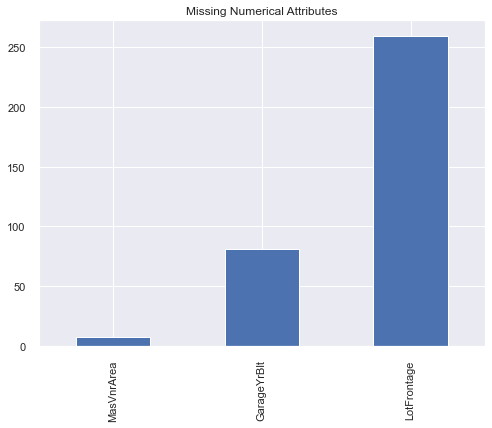

In [14]:
# Find Missing Values in Housing Dataset for Numerical Attributes*/
plt.figure(figsize=(8,6))
missing=housing[num_col].isnull().sum()
missing= missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title("Missing Numerical Attributes")

__3 Numerical attributes__ have missing values. We can also assume that __most of times NAN means lack of subject__ described by attribute, like no garage hence no Garage Year Built information, but we need to confirm on that.

In [15]:
#Checking Outliers at 25%, 50%, 75%, 90%, 95% and 99%
housing[['LotFrontage','GarageYrBlt','MasVnrArea']].describe(percentiles=[.25,.5,.75,.90,.95,.99])


,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
90%,96.000000,2006.000000,335.000000
95%,107.000000,2007.000000,456.000000
99%,141.000000,2009.000000,791.920000


- From the distribution shown above, you can see there are __some outliers__ in the attributes __LotFrontage__ and __MasVnrArea__ as data has a steep rise from 99 percentile to 100 percentile

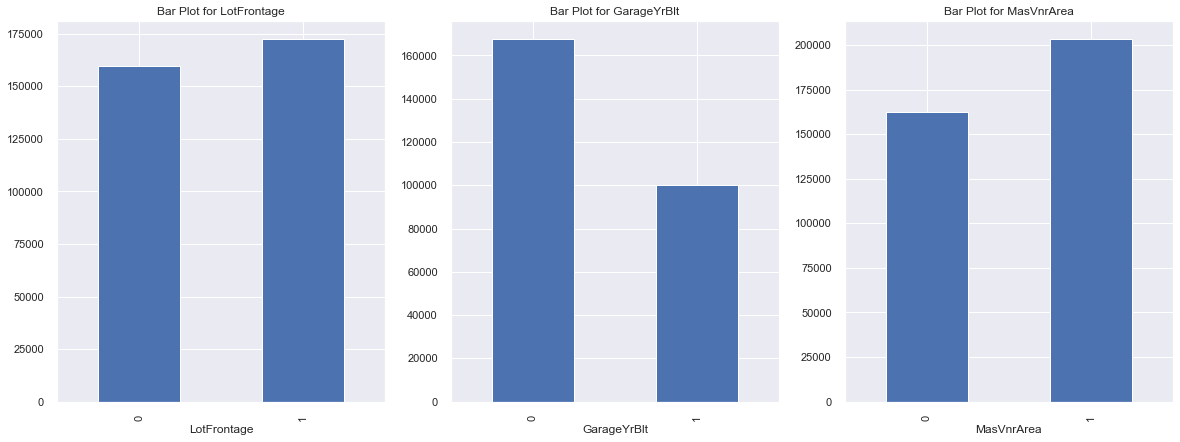

In [16]:
#Let's calculate the mean SalePrice where the information is missing
f,ax = plt.subplots(1,3,figsize=(20,7))
housing_M= housing.copy()

# Converting Missing Values to "1" and Non-Missing Values to "0"
housing_M['LotFrontage']= np.where(housing_M['LotFrontage'].isnull(),1,0)
housing_M['GarageYrBlt']= np.where(housing_M['GarageYrBlt'].isnull(),1,0)
housing_M['MasVnrArea']= np.where(housing_M['MasVnrArea'].isnull(),1,0)

#Plotting bar plots to see the impact of Missing Values on Target Variable (SalePrice)
housing_M.groupby('LotFrontage')['SalePrice'].median().plot.bar(ax=ax[0])
housing_M.groupby('GarageYrBlt')['SalePrice'].median().plot.bar(ax=ax[1])
housing_M.groupby('MasVnrArea')['SalePrice'].median().plot.bar(ax=ax[2])
ax[0].set_title('Bar Plot for LotFrontage')
ax[1].set_title('Bar Plot for GarageYrBlt')
ax[2].set_title('Bar Plot for MasVnrArea')
plt.show()

We clearly see that __Missing Values (referred as "1")__ does have an __impact on Target Variable__ which is __SalePrice__

In [17]:
#Top 5 Features Correlated with LotFrontage
corrmat = housing.corr()
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'LotFrontage')['LotFrontage']
pd.DataFrame({
    
    'correlation with LotFrontage':cols
}).round(decimals=2).sort_values('correlation with LotFrontage',ascending=False).style.bar(color=['grey','lightblue'],align='zero')



,correlation with LotFrontage
LotFrontage,1.000000
1stFlrSF,0.460000
LotArea,0.430000
GrLivArea,0.400000
TotalBsmtSF,0.390000
TotRmsAbvGrd,0.350000


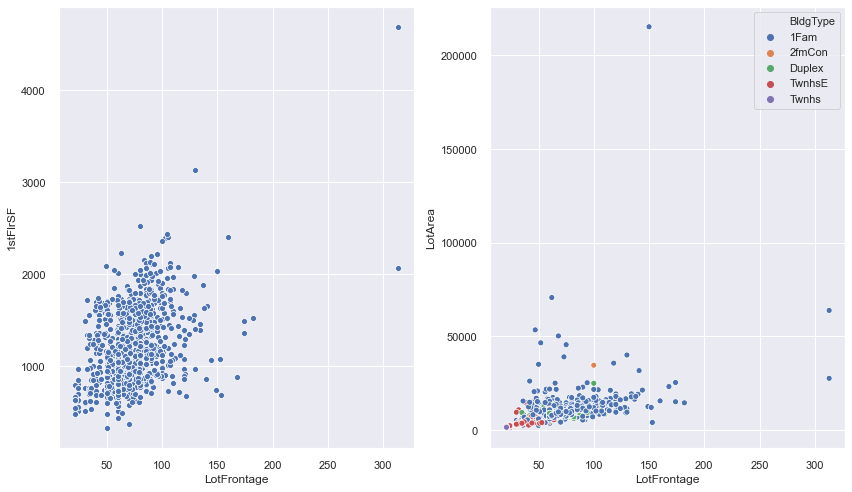

In [18]:
#Checking plots of LotFrontage with the top 2 Correlated Features
f,ax = plt.subplots(1,2,figsize=(12,7))
sns.scatterplot(x=housing['LotFrontage'],y=housing['1stFlrSF'],ax=ax[0])
sns.scatterplot(x=housing['LotFrontage'],y=housing['LotArea'],ax=ax[1],hue=housing['BldgType'])
plt.tight_layout()

We observe tight grouping of very low LotFrontage value with both the correlated attributes <br>
Nothing confirms the reason of null values in LotFrontage, so we will __replace the missing values__ of LotFrontage with __median value__

In [19]:
#Top 5 Features Correlated with GarageYrBlt
corrmat = housing.corr()
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'GarageYrBlt')['GarageYrBlt']
pd.DataFrame({
    
    'correlation with GarageYrBlt':cols
}).round(decimals=2).sort_values('correlation with GarageYrBlt',ascending=False).style.bar(color=['grey','lightblue'],align='zero')


,correlation with GarageYrBlt
GarageYrBlt,1.000000
YearBuilt,0.830000
YearRemodAdd,0.640000
GarageCars,0.590000
GarageArea,0.560000
OverallQual,0.550000


In [20]:
#Finding the Percentage match of garage and houses built in the same year
match_pct_yr=(housing[housing['GarageYrBlt']==housing['YearBuilt']]['GarageYrBlt'].count()/1460)*100
print ('Perentage match between Garage Built Year and House Built Year is :' ,match_pct_yr)

Perentage match between Garage Built Year and House Built Year is : 74.58904109589041


- __Garages mostly seem to be built in the same year as houses__

In [21]:
#Check head of data for GarageYearBuilt is null
top_5=housing[housing['GarageYrBlt'].isnull()][['GarageYrBlt','YearBuilt','YearRemodAdd','GarageArea','GarageCars']].head()
print (top_5)
sum_area=housing[housing['GarageYrBlt'].isnull()]['GarageArea'].sum() #Find the sum of area for null values in GarageYrBlt 
print ('The sum of garage area of missing GarageYrBlt is : ',sum_area)

    GarageYrBlt  YearBuilt  YearRemodAdd  GarageArea  GarageCars
39          NaN       1955          1955           0           0
48          NaN       1920          2008           0           0
78          NaN       1968          1968           0           0
88          NaN       1915          1982           0           0
89          NaN       1994          1995           0           0
The sum of garage area of missing GarageYrBlt is :  0


__It confirms our suspicion that there is no garage built and that is the reason the information is missing.__

In [22]:
print('Sample Records where MasVnrArea is not null')
print ('-----------------------------')
print(housing[~housing['MasVnrArea'].isnull()][['MasVnrArea','MasVnrType']].head())

print ('               ')
print('Sample Records where MasVnrArea is null')
print ('-----------------------------')
print(housing[housing['MasVnrArea'].isnull()][['MasVnrArea','MasVnrType']].head())

Sample Records where MasVnrArea is not null
-----------------------------
   MasVnrArea MasVnrType
0       196.0    BrkFace
1         0.0       None
2       162.0    BrkFace
3         0.0       None
4       350.0    BrkFace
               
Sample Records where MasVnrArea is null
-----------------------------
     MasVnrArea MasVnrType
234         NaN        NaN
529         NaN        NaN
650         NaN        NaN
936         NaN        NaN
973         NaN        NaN


__MasVnrArea__ and __MasVnrType__ has same amount of missing value (0.54%) and based on sample data, it confirms that Masonry veneer is not present at the property and hence the values are null

__We cannot leave Nan (Null) values in numerical columns so we will replace the values with median values__ <br>
__But, after replacing the missing values, we will lose the information on missing values so to handle that we will add new features to capture that information__

In [23]:
housing1=housing.copy()     #Create a copy of original dataFrame
housing1.shape

(1460, 81)

In [24]:
#Creating new features 

housing1['LotFrontage_NAN']= np.where(housing1['LotFrontage'].isnull(),1,0)
housing1['GarageYrBlt_NAN']= np.where(housing1['GarageYrBlt'].isnull(),1,0)
housing1['MasVnrArea_NAN']= np.where(housing1['MasVnrArea'].isnull(),1,0)

In [25]:
housing1.shape #Rechecking shape

(1460, 84)

In [26]:
#Replace missing values with median values

housing1['LotFrontage'].fillna(value=housing1['LotFrontage'].median(),inplace=True) 
housing1['GarageYrBlt'].fillna(value=housing1['GarageYrBlt'].median(),inplace=True) 
housing1['MasVnrArea'].fillna(value=housing1['MasVnrArea'].median(),inplace=True)

In [27]:
#Check the missing values after the fix
housing1[['LotFrontage','GarageYrBlt','MasVnrArea']].isnull().sum() 

LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

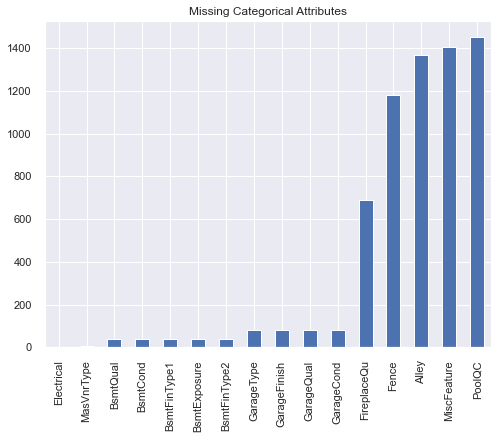

In [28]:
# Find Missing Values in Housing Dataset for Categorical Columns*/
plt.figure(figsize=(8,6))
missing=housing[qual_col].isnull().sum()
missing= missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title("Missing Categorical Attributes")
plt.show()

16 Categorical attributes have missing values, 3 over 90% of all data. Most of times NAN means lack of subject described by attribute like __missing pool, fence, no garage and basement.__

In [29]:
#Checking Percentage of missing records
(missing/housing[qual_col].shape[0])*100

Electrical       0.068493
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In order to handle the above we will __replace missing values__ with new __Label 'MISSING'__



In [30]:
#Replace missing values with new label "MISSING" 
housing1[qual_col]=housing1[qual_col].fillna('MISSING')

In [31]:
#Check the Missing Values
housing1[list(missing.index)].isnull().sum()

Electrical      0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtFinType1    0
BsmtExposure    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
Alley           0
MiscFeature     0
PoolQC          0
dtype: int64

__Adding new boolean features to handle Zeros/Missing values in the data__

Adding label helps in analyzing the Missing information in the raw attribute and creating new features also helps us to keep a track of missing information in case we decide to replace missing values later.

In [32]:
#Creating 13 new features 
housing1['HasBasement'] = housing1['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasGarage'] = housing1['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
housing1['Has2ndFloor'] = housing1['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasMasVnr'] = housing1['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasWoodDeck'] = housing1['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasPorch'] = housing1['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
housing1['Has3SsnPorch'] = housing1['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasEnclosedPorch'] = housing1['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasPool'] = housing1['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasFence'] = housing1['Fence'].apply(lambda x: 1 if x in ['MnPrv', 'GdWo', 'GdPrv', 'MnWw'] else 0)
housing1['HasAlley'] = housing1['Alley'].apply(lambda x: 1 if x in ['Grvl', 'Pave'] else 0)
housing1['HasMiscFeature'] = housing1['MiscFeature'].apply(lambda x: 1 if x in ['Shed', 'Gar2', 'Othr', 'TenC'] else 0)
housing1['IsNew'] = housing1['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

In [33]:
housing1[['IsNew','HasPorch','HasMasVnr','HasWoodDeck','HasGarage','Has2ndFloor','HasBasement','HasPool',
          'Has3SsnPorch','HasMiscFeature','HasFence','HasAlley','HasEnclosedPorch']].head()

,IsNew,HasPorch,HasMasVnr,HasWoodDeck,HasGarage,Has2ndFloor,HasBasement,HasPool,Has3SsnPorch,HasMiscFeature,HasFence,HasAlley,HasEnclosedPorch
0,1,1,1,0,1,1,1,0,0,0,0,0,0
1,0,0,0,1,1,0,1,0,0,0,0,0,0
2,1,1,1,0,1,1,1,0,0,0,0,0,0
3,0,1,0,0,1,1,1,0,0,0,0,0,1
4,0,1,1,1,1,1,1,0,0,0,0,0,0


__Dropping Features__

In [34]:
#Check Shape
housing1.shape

(1460, 97)

In [35]:
#Check Columns
housing1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [36]:
#Dropping Id from the DataFrame as it is unique key and does not add any value for our analysis
housing1.drop(['Id'],inplace=True,axis=1)

In [37]:
#check housing1 shape after adding features
housing1.shape

(1460, 96)

<a id=section4></a>
## 4 Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

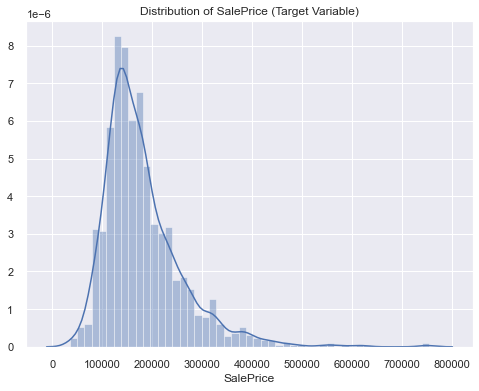

In [38]:
#Check the Distribution of Target Variable
plt.figure(figsize=(8,6))
sns.distplot(housing['SalePrice'])
plt.title('Distribution of SalePrice (Target Variable)')
plt.show()

The distribution of Sales Price is slightly __right skewed__ but still good enough to proceed for __Multiple Linear Regression__
<br>
Please note that training a linear regression model does not require that the explanatory or target variables are normally distributed. The normality assumption is only a requirement for certain statistical tests and hypothesis tests.

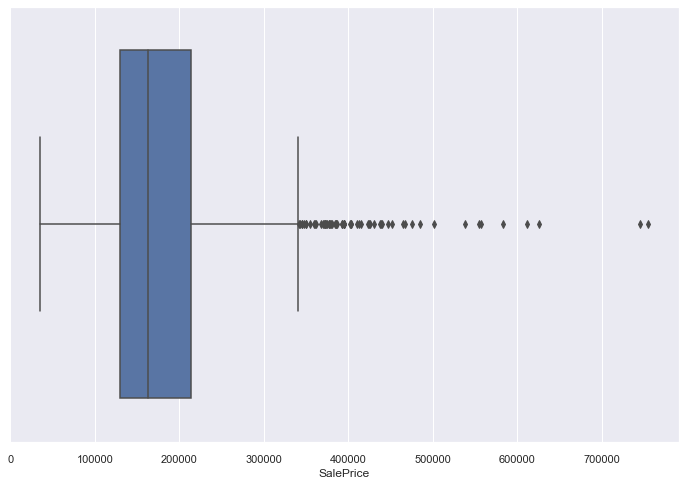

In [39]:
#Check for Outliers
plt.figure(figsize=(12,8))
sns.boxplot(housing1['SalePrice'])
plt.show()

- It seems there are __outliers__ as we can see properties with very high SalePrice range.
<br>
- We will learn to deal with this later.

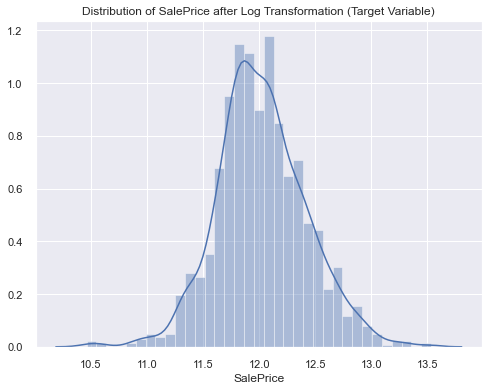

In [40]:
#check if a transformation by Log 1P could correct the skewness in the target variable
housing1['SalePrice']=np.log(housing1['SalePrice'])
plt.figure(figsize=(8,6))
sns.distplot(housing1['SalePrice'])
plt.title('Distribution of SalePrice after Log Transformation (Target Variable)')
plt.show()

The target variable looks more normally distributed after the log transformation

<a id=section401></a>
### 4.1 Visualising Numeric Variables

Let's compare Numerical Variables with SalePrice

In [41]:
#Find Discrete Features [Assuming Distinct Values less than 25]
discrete_feature= [x for x in num_col if len(housing1[x].unique())<25]
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [42]:
#Find Continuous Features
continuous_feature= [x for x in num_col if x not in discrete_feature]
continuous_feature

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

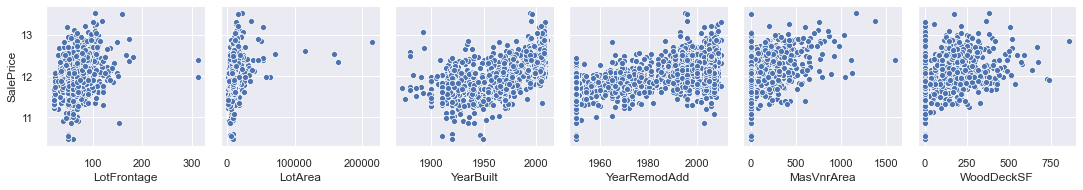

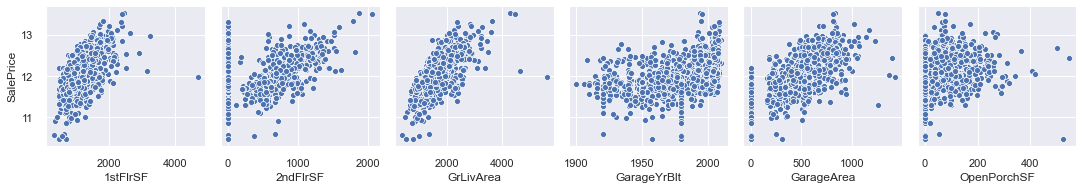

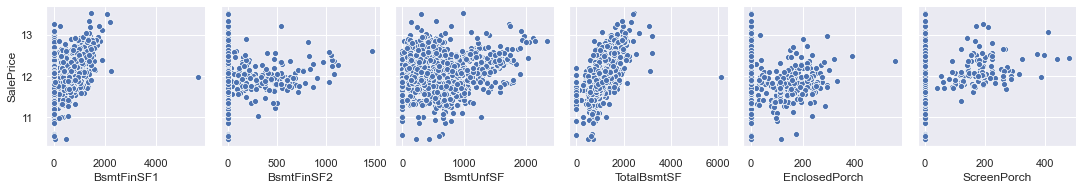

In [43]:
#Comparing Continuous Numerical Features with SalePrice

cols=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','WoodDeckSF']
cols1=['1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','OpenPorchSF']
cols2=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','EnclosedPorch','ScreenPorch']


sns.pairplot(housing1,x_vars=cols,y_vars=['SalePrice'])
sns.pairplot(housing1,x_vars=cols1,y_vars=['SalePrice'])
sns.pairplot(housing1,x_vars=cols2,y_vars=['SalePrice'])
plt.show()

- __GrLivArea, 1stFlrSF, TotalBsmtSF__ show __positive Correlation__ with SalePrice

__We don´t have a feature with total area, maybe it is an interesting feature to create__

In [44]:
#Adding total area feature to the dataframe
housing1['TotalArea'] = (housing1.TotalBsmtSF + housing1.WoodDeckSF + housing1.GrLivArea +
                             housing1.OpenPorchSF + housing1['3SsnPorch'] + housing1.ScreenPorch + housing1.EnclosedPorch +
                             housing1.MasVnrArea + housing1.GarageArea + housing1.PoolArea)

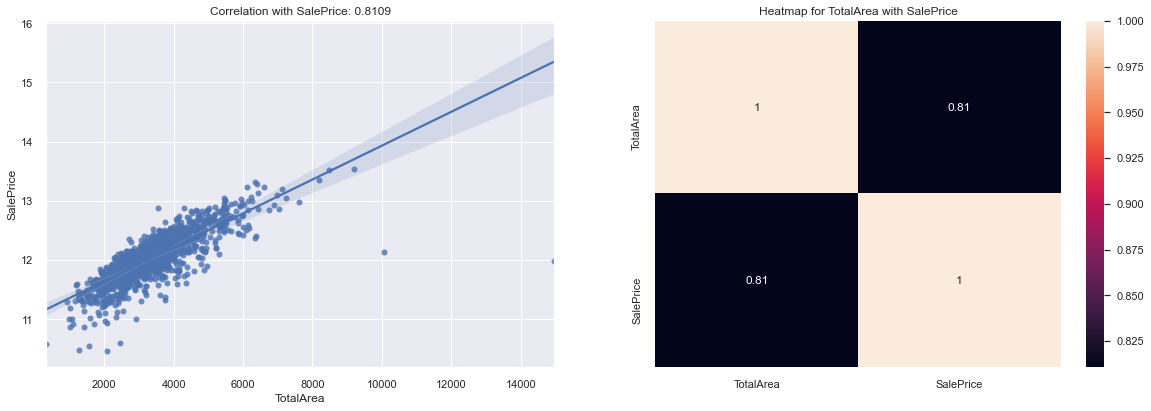

In [45]:
#Plotting Regplot of Total Area with SalePrice
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.regplot(x='TotalArea',y='SalePrice',data=housing1)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.TotalArea.corr(housing1['SalePrice'])))

plt.subplot(2,2,2)
sns.heatmap(housing1[['TotalArea','SalePrice']].corr(),annot=True)
plt.title('Heatmap for TotalArea with SalePrice')
plt.show()

__TotalArea__ correlation seems to be very high with the __SalePrice__

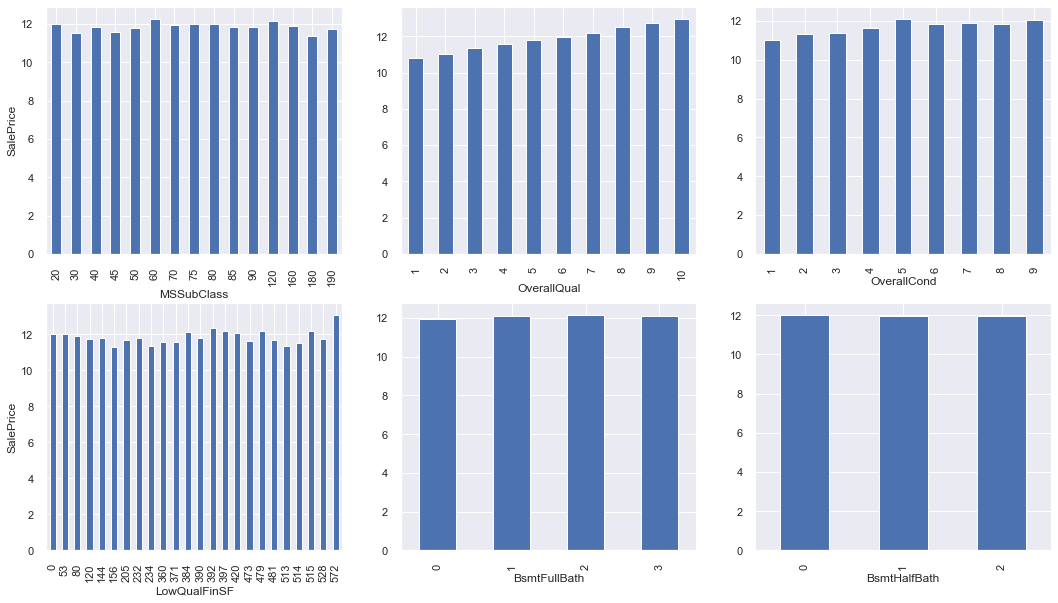

In [46]:
#Comparing Discrete Numerical columns with SalePrice
#Plotting BarGraph for first six Discrete Features
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
housing1.groupby('MSSubClass')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,2)
housing1.groupby('OverallQual')['SalePrice'].median().plot.bar()
plt.subplot(2,3,3)
housing1.groupby('OverallCond')['SalePrice'].median().plot.bar()
plt.subplot(2,3,4)
housing1.groupby('LowQualFinSF')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,5)
housing1.groupby('BsmtFullBath')['SalePrice'].median().plot.bar()
plt.subplot(2,3,6)
housing1.groupby('BsmtHalfBath')['SalePrice'].median().plot.bar()
plt.show()

- __OverallQual__ has linear growth to SalePrice

- __MSSubClass__ does not seem to impact much on the Saleprice of the house

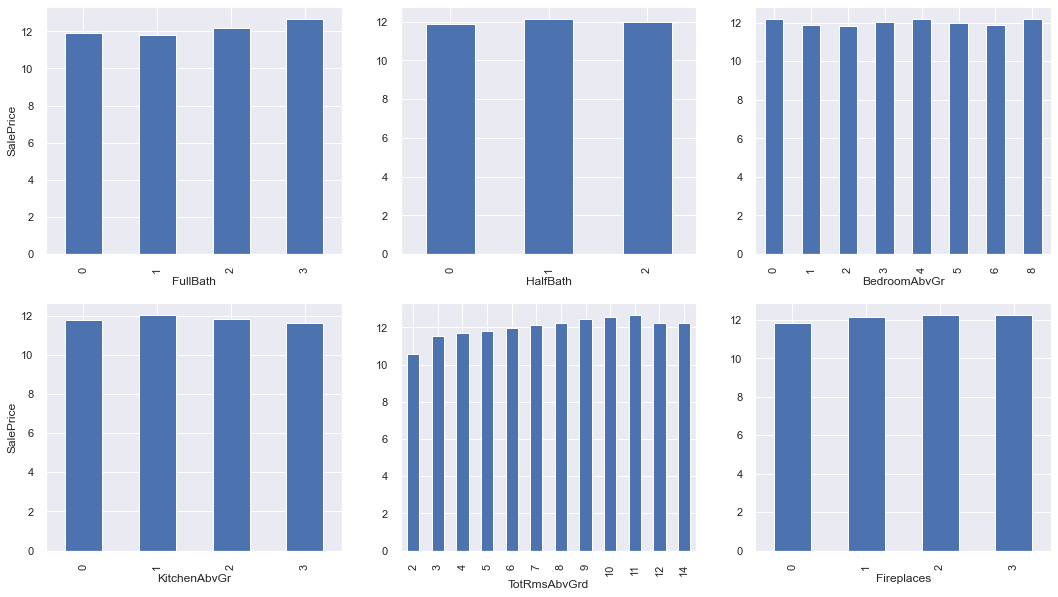

In [47]:
#Plotting BarGraph for next six Discrete Features
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
housing1.groupby('FullBath')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,2)
housing1.groupby('HalfBath')['SalePrice'].median().plot.bar()
plt.subplot(2,3,3)
housing1.groupby('BedroomAbvGr')['SalePrice'].median().plot.bar()
plt.subplot(2,3,4)
housing1.groupby('KitchenAbvGr')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,5)
housing1.groupby('TotRmsAbvGrd')['SalePrice'].median().plot.bar()
plt.subplot(2,3,6)
housing1.groupby('Fireplaces')['SalePrice'].median().plot.bar()
plt.show()

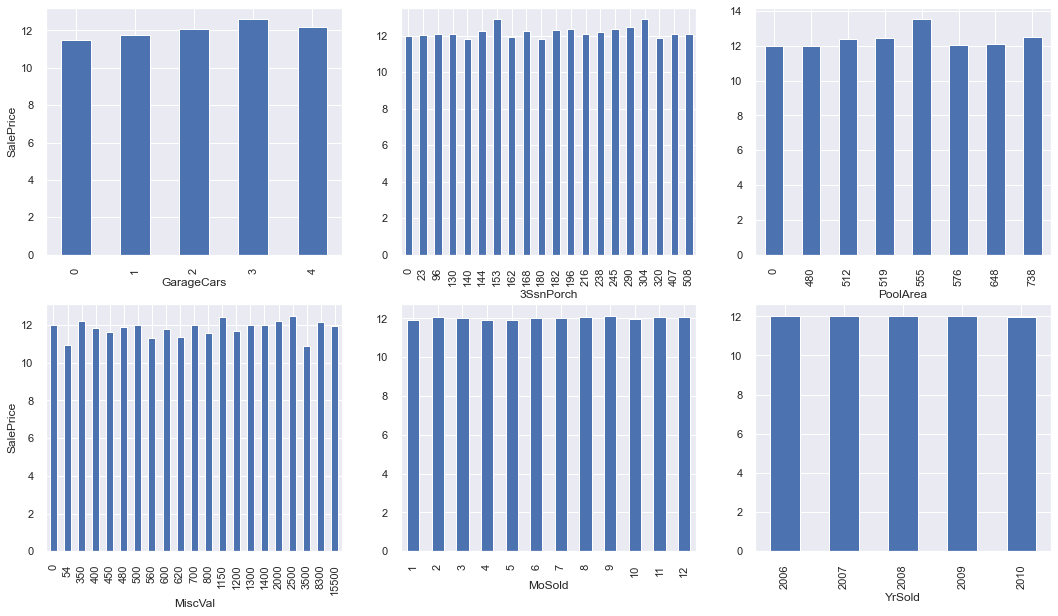

In [48]:
#Plotting BarGraph for last six Discrete Features
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
housing1.groupby('GarageCars')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,2)
housing1.groupby('3SsnPorch')['SalePrice'].median().plot.bar()
plt.subplot(2,3,3)
housing1.groupby('PoolArea')['SalePrice'].median().plot.bar()
plt.subplot(2,3,4)
housing1.groupby('MiscVal')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,5)
housing1.groupby('MoSold')['SalePrice'].median().plot.bar()
plt.subplot(2,3,6)
housing1.groupby('YrSold')['SalePrice'].median().plot.bar()
plt.show()

- We also see a __slight decline__ in __SalePrice with YrSold__ which usually dont happen (We will do more analysis on this later)

- MoSold doesnt seem to impact much the Saleprice of the house

Comparing all the __numerical predictor variables__ with __Target Variable (SalePrice)__, we can see dependent variables like __GrLivArea, 1stFlrSF, YearBuilt, 2ndFlrSF, GarageArea__ etc. __showing some Linear Relationship__ with the independent variable which makes Linear Regression Model one of the candidates to solve the given Problem Statement.

In [49]:
#Creating new features based on above Numerical Features
housing1['GrLivAreaperRoom'] = housing1.GrLivArea/housing1.TotRmsAbvGrd
housing1['GrLivArea_multiply_Rooms'] = housing1.GrLivArea*housing1.TotRmsAbvGrd

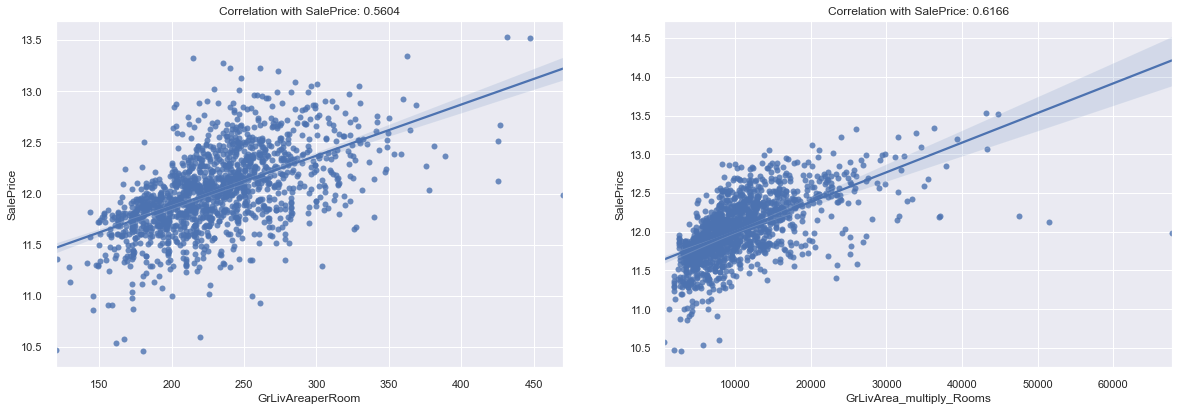

In [50]:
#Plotting Regplot of GrLivAreaperRoom and GrLivArea_multiply_Rooms with SalePrice
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.regplot(x='GrLivAreaperRoom',y='SalePrice',data=housing1)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.GrLivAreaperRoom.corr(housing1['SalePrice'])))

plt.subplot(2,2,2)
sns.regplot(x='GrLivArea_multiply_Rooms',y='SalePrice',data=housing1)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.GrLivArea_multiply_Rooms.corr(housing1['SalePrice'])))
plt.show()

Lets check the correlation value of __Independent variables__ with __SalePrice__

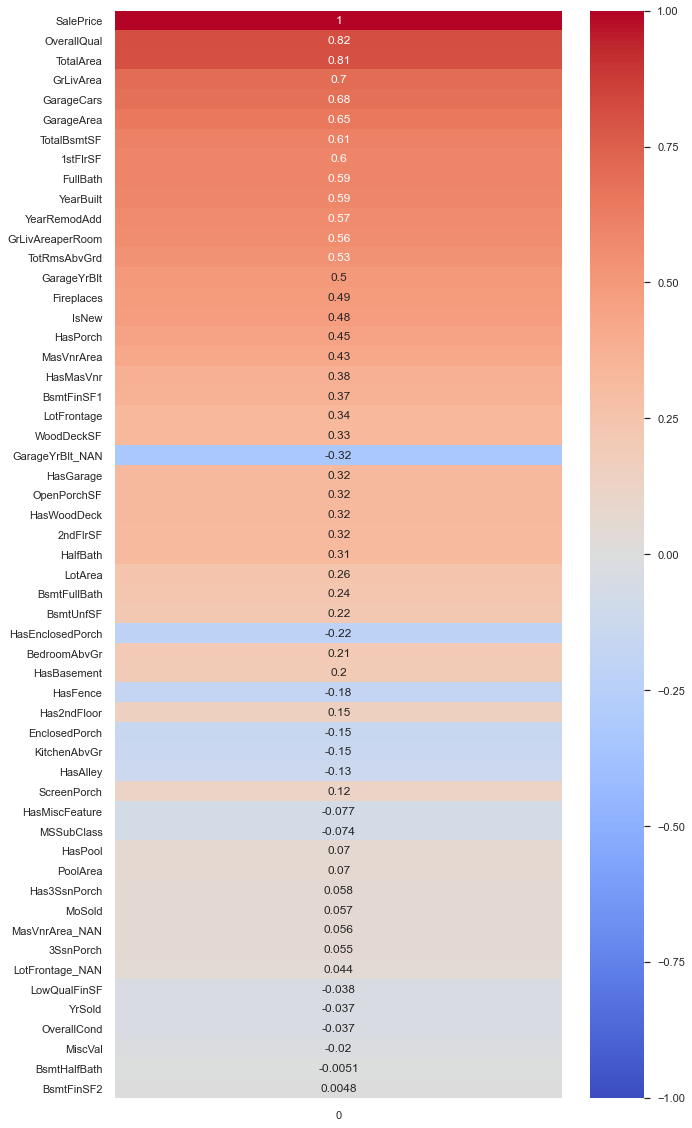

In [51]:
#Checking Correlation of SalePrice with other numerical attributes
correlations = housing1.corrwith(housing1['SalePrice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

### 4.2 Correlation between Numerical Attributes

Making a pairplot of all the numeric variables would be too messy so lets create a heatmap to check the correlation between the independent variables

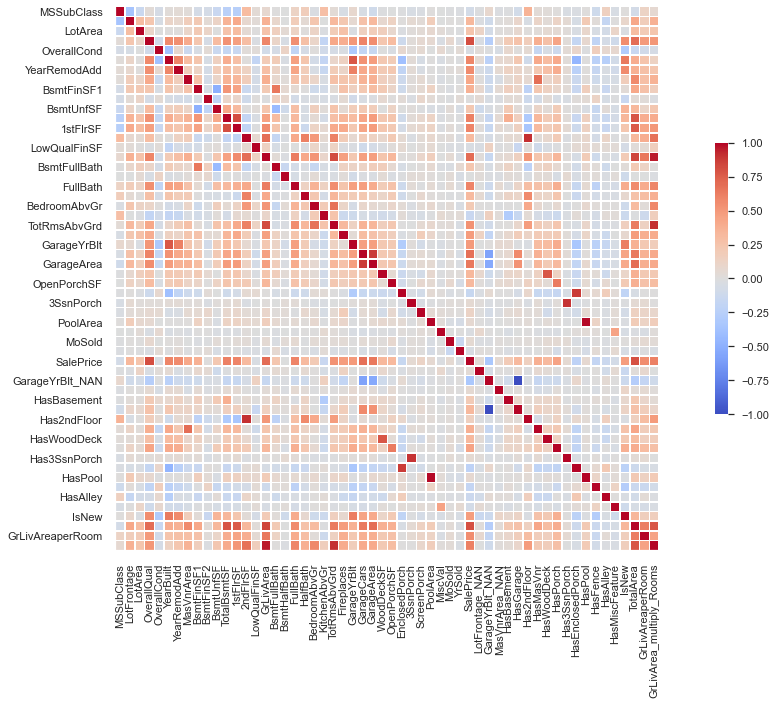

In [52]:
#Correlation between numerical attributes 
plt.figure(figsize=(20,10))
corr = housing1.corr()
g = sns.heatmap(corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f', cmap='coolwarm')
sns.despine()
#g.figure.set_size_inches(20,10)
    
plt.show()

There are lot of __multicollinearity__ in our dataset which needs to be handled. Some examples below: <br>

There are lot of __strong positive correlation__ between numerical attributes <br>
 - GarageYrBlt: (Year garage was built) is __highly correlated__ with <br>
     - GarageCars: Size of garage in car capacity
     - GarageArea: Size of garage in square feet
     - OverallQual: Overall material and finish quality
     - YearBuilt: Original construction date
     - And More..
     
     <br/>
     
 - TotalBsmtSF: (Total square feet of basement area) is __highly correlated__ with <br>
     - 1stFlrSF: First Floor square feet
     - LotFrontage: Linear feet of street connected to property
     - LotArea: Lot size in square feet
     - OverallQual: Overall material and finish quality
     - YearBuilt: Original construction date
     - YearRemodAdd: Remodel date
     - MasVnrArea: Masonry veneer area in square feet
     - BsmtFinSF1: Type 1 finished square feet
     - And More..
 

__High negative correlation__ between <br>
 - BsmtFinSF1: (Type 1 finished square feet) -- BsmtUnfSF: (Unfinished square feet of basement area) <br>
 - BsmtFullBath: (Basement full bathrooms) -- BsmtUnfSF: (Unfinished square feet of basement area) <br>
 - EnclosedPorch: (Enclosed porch area in square feet) -- YearBuilt: (Original construction date)
 


In [53]:
#Top 20 Features Correlated with SalesPrice
corrmat = housing1.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'TotalArea', 'GrLivArea', 'GarageCars',
       'GarageArea', 'GrLivArea_multiply_Rooms', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'GrLivAreaperRoom',
       'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'IsNew', 'HasPorch',
       'MasVnrArea', 'HasMasVnr'],
      dtype='object')

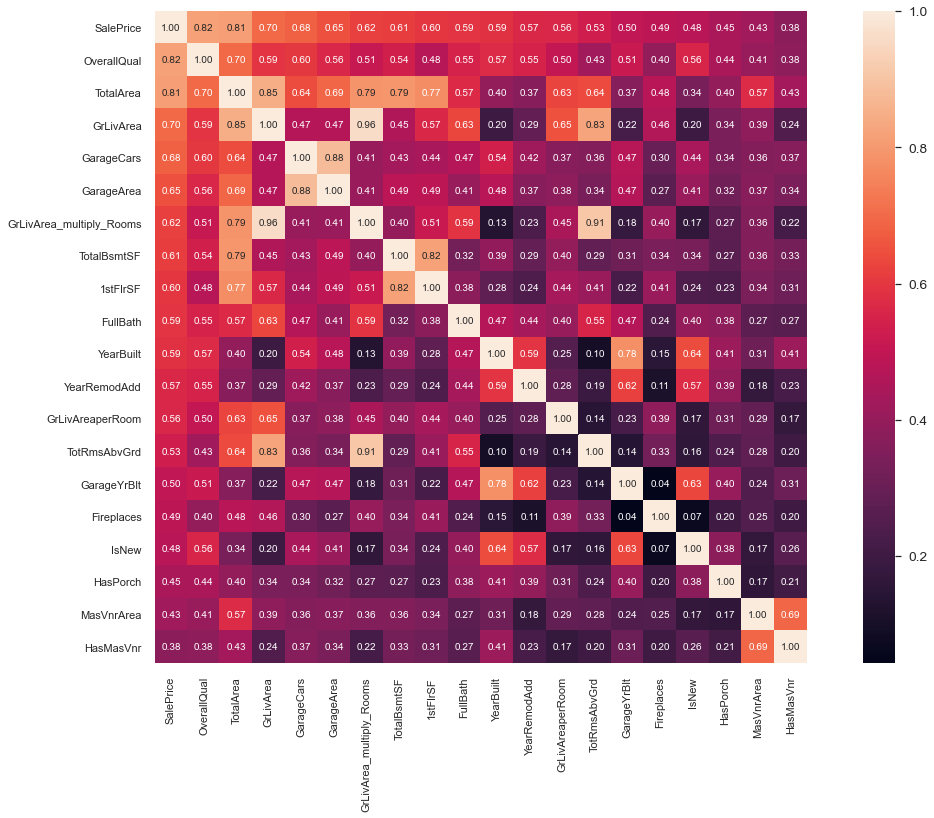

In [54]:
#Checking the Correlation for the top 20 Features using Heatmap
cm =np.corrcoef(housing1[cols].values.T)
plt.subplots(figsize=(20,12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

__Garages seem to be built same year as houses whereas basements have generally same area as first floor which is pretty obvious.<br> 
Garage area is strongly correlated with number of cars. <br>
Total Rooms above ground is also highly correlated with Above grade (ground) living area square feet.__

__Bathrooms Features__

It's time to take a break and go to the toilet, to our luck there are 4 bathroom variables in our data set

<img src="https://cdn.home-designing.com/wp-content/uploads/2019/11/red-bathroom-vanity.jpg" style="width: 450px; height: 500.461px; margin: 5px;">

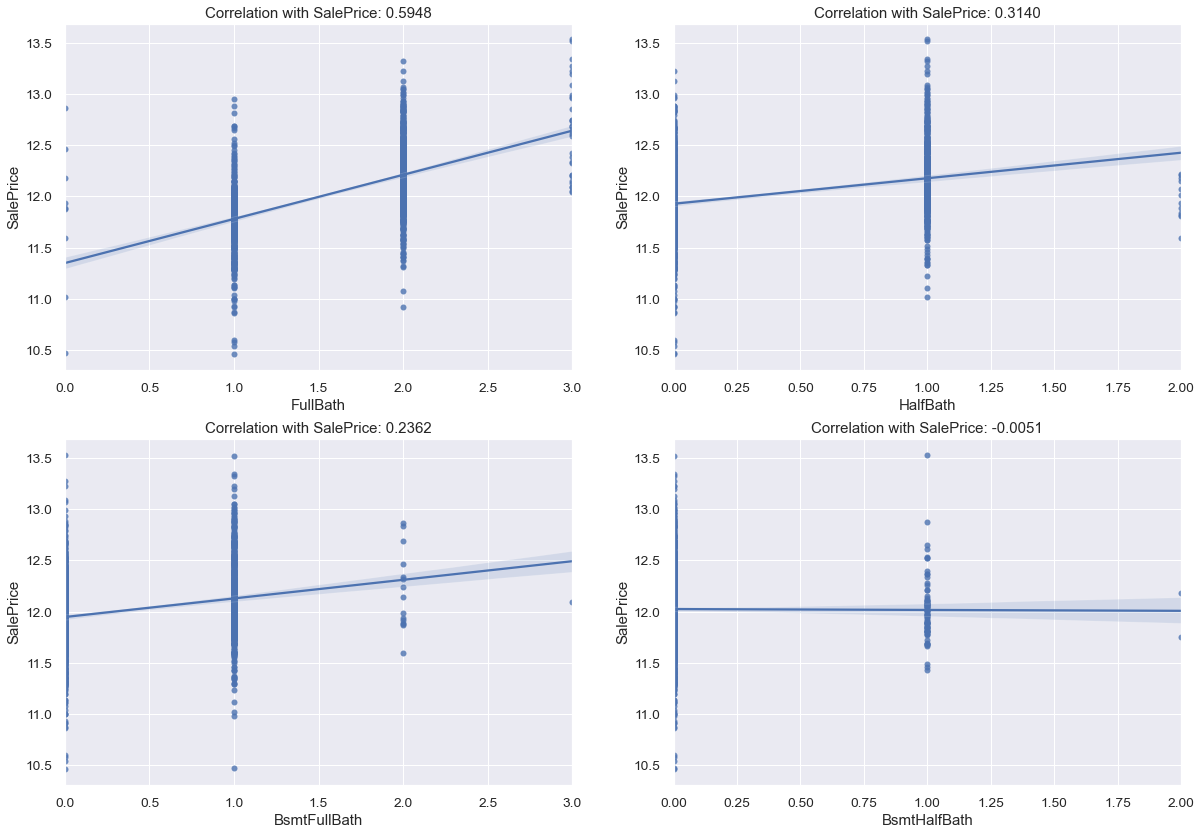

In [55]:
#Plotting BarGraph for last 4 Bathroom Features
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.regplot(x='FullBath',y='SalePrice',data=housing1)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.FullBath.corr(housing1['SalePrice'])))
plt.subplot(2,2,2)
sns.regplot(x='HalfBath',y='SalePrice',data=housing1)
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.HalfBath.corr(housing1['SalePrice'])))
plt.subplot(2,2,3)
sns.regplot(x='BsmtFullBath',y='SalePrice',data=housing1)
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.BsmtFullBath.corr(housing1['SalePrice'])))
plt.subplot(2,2,4)
sns.regplot(x='BsmtHalfBath',y='SalePrice',data=housing1)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.BsmtHalfBath.corr(housing1['SalePrice'])))
plt.show()

- FullBath has the largest correlation with SalePrice. The others individually, these features may not be very important.

 Adding them up into one predictor, this predictor is likely to become a strong one

In [56]:
#Creating Bathroom DataFrame to analyse on bathroom Features
df_bathroom = housing1[['SalePrice', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']]
df_bathroom ['TotBathrooms'] = df_bathroom.FullBath + (df_bathroom.HalfBath*0.5) + df_bathroom.BsmtFullBath + (df_bathroom.BsmtHalfBath*0.5)


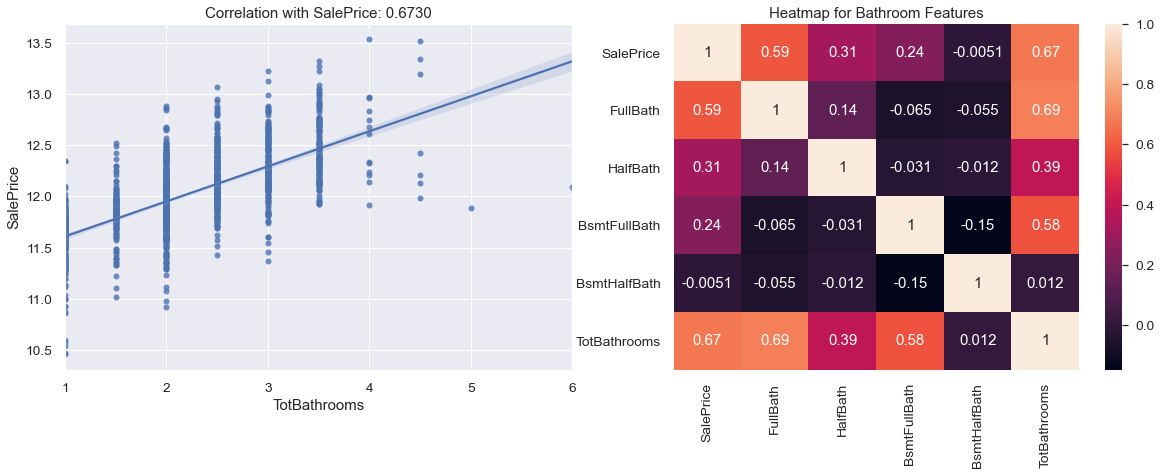

In [57]:
#Plotting Regplot of Total bathroom with SalePrice
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.regplot(x='TotBathrooms',y='SalePrice',data=df_bathroom)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_bathroom.TotBathrooms.corr(housing1['SalePrice'])))

plt.subplot(2,2,2)
sns.heatmap(df_bathroom.corr(),annot=True)
plt.title('Heatmap for Bathroom Features')
plt.show()

- __Total Bathrooms__ have a better correlation than other bathroom features to SalePrice

__Year Features__

__Lets look at the relationship between Year of Property Sold with the median of SalePrice__

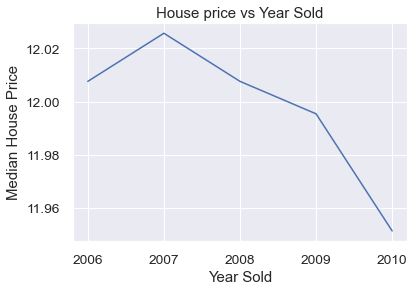

In [58]:
#Checking Year Sold vs Median House  Price
housing1.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title ('House price vs Year Sold')
plt.show()

- As the year increases, the __expectation__ is that __SalePrice should increase__ but here __its decreasing which is weird.__

__Year Features__

Year_Built vs Garage_Year_Built vs Year_Remodeled

<img class="n3VNCb" src="https://headfonia.com/wp-content/uploads/2015/12/Happy-New-Year-2015-2016-2017.jpg" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 450px; height: 318.261px; margin: 0px;">

In [59]:
#Find all features with Year
Yr_Feature=[x for x in housing.columns if 'Yr' in x or 'Year' in x ]
Yr_Feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

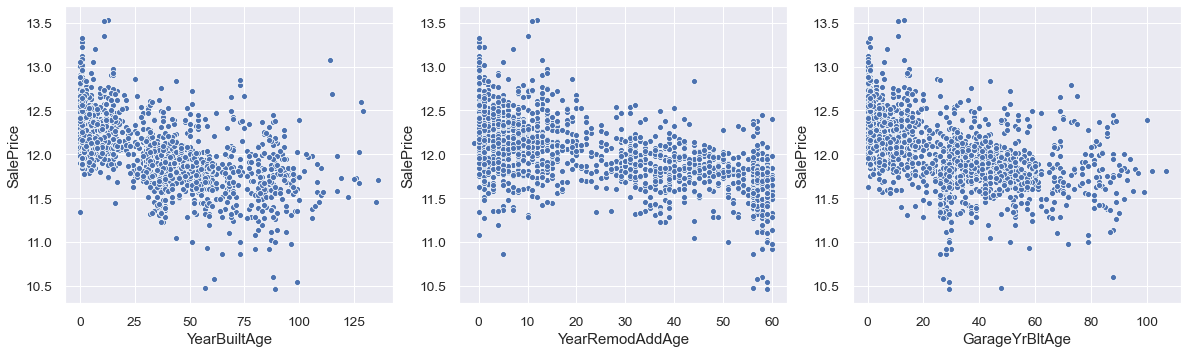

In [60]:
#Calculating Other Year Features (e.g. House Age) as Number of Years from the "YrSold"
housing1['YearBuiltAge']=housing1['YrSold'] - housing1['YearBuilt']
housing1['YearRemodAddAge']=housing1['YrSold'] - housing1['YearRemodAdd']
housing1['GarageYrBltAge']=housing1['YrSold'] - housing1['GarageYrBlt']

#Plotting scatterplot between other Year Features with Saleprice
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.scatterplot(x = 'YearBuiltAge', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.scatterplot(x = 'YearRemodAddAge', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.scatterplot(x = 'GarageYrBltAge', y = 'SalePrice', data = housing1)
plt.show()

- __This shows the less age of the house, the higher the SalePrice of the Property__

In [61]:
#Create new Feature "HasRemod" to add value (1/0)
housing1['HasRemod'] = 2
housing1.loc[(housing1.YearBuiltAge==housing1.YearRemodAddAge), ['HasRemod']] = 0  #No Remodeling
housing1.loc[(housing1.YearBuiltAge!=housing1.YearRemodAddAge), ['HasRemod']] = 1  #Remodeled
housing1['HasRemod'].value_counts()


0    764
1    696
Name: HasRemod, dtype: int64

In [62]:
#Add new features 
#Transformed Feature : YearBuiltAge * GarageYrBltAge
housing1['YearBuilt_multiply_Garage'] = housing1.YearBuiltAge*housing1.GarageYrBltAge

#Transformed Feature : if GarageYrBltAge > YearBuiltAge then Garage new flag = 1 else 0
housing1['Garage_Newest_Flg'] = np.where(housing1.YearBuiltAge < housing1.GarageYrBltAge,1,0)

In [63]:
#Check data
housing1[['YearBuiltAge','YearRemodAddAge','GarageYrBltAge','SalePrice','HasRemod','YearBuilt_multiply_Garage',
                 'Garage_Newest_Flg']].head()

,YearBuiltAge,YearRemodAddAge,GarageYrBltAge,SalePrice,HasRemod,YearBuilt_multiply_Garage,Garage_Newest_Flg
0,5,5,5.0,12.247694,0,25.0,0
1,31,31,31.0,12.109011,0,961.0,0
2,7,6,7.0,12.317167,1,49.0,0
3,91,36,8.0,11.849398,1,728.0,0
4,8,8,8.0,12.429216,0,64.0,0


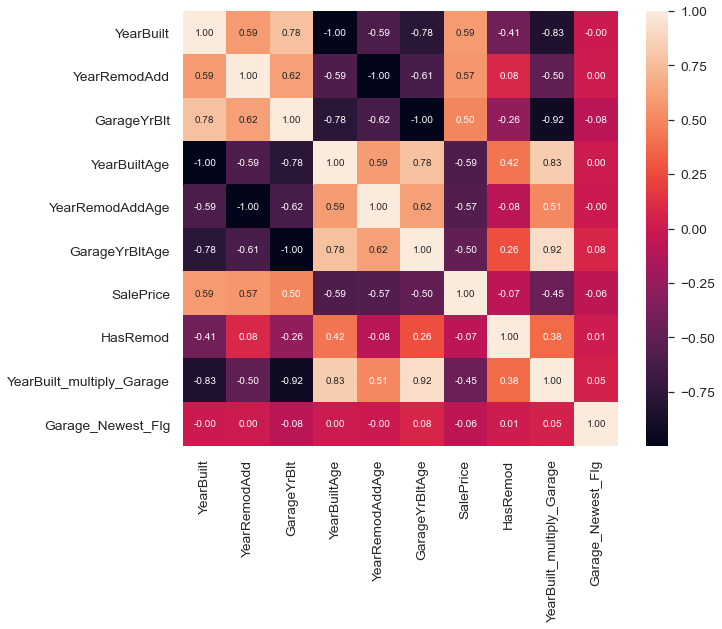

In [64]:
#Plotting heatmap between various updated year  features with SalePrice
plt.figure(figsize=(10,8))
sns.heatmap(housing1[['YearBuilt','YearRemodAdd','GarageYrBlt','YearBuiltAge','YearRemodAddAge','GarageYrBltAge','SalePrice','HasRemod','YearBuilt_multiply_Garage',
                 'Garage_Newest_Flg']].corr(),cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
            )
plt.show()

- Raw attribute __YearBuilt, YearRemodAdd and GarageYrBlt__ can be dropped because of high correlation
- __YearBuiltAge__ has high correlation with __GarageYrBltAge, YearBuilt_multiply_Garage, and YearRemodAddAge__
- __HasRemod and Garage_Newest_Flg__ is added as Categorical Features and does not have high correlation with any of the other Year Features

__Garage Features__

Its time to park the analysis to Garage Features

<img class="n3VNCb" src="https://www.familyhandyman.com/wp-content/uploads/2020/02/GettyImages-1191772225-1024x1024.jpg" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 450px; height: 450px; margin: 0px;">

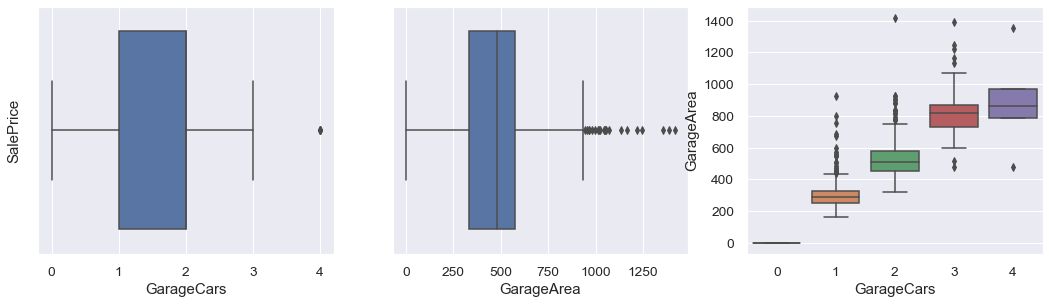

In [65]:
#Plotting graphs for Garage Features
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
sns.boxplot(x='GarageCars',data=housing1)
plt.ylabel('SalePrice')
plt.subplot(2,3,2)
sns.boxplot(x='GarageArea',data=housing1)
plt.subplot(2,3,3)
sns.boxplot(x='GarageCars',y='GarageArea',data=housing1)
plt.show()

- Garage Cars is highly correlated with Garage Area which makes sense

Let's try to create new Garage Features

In [66]:
#Creating new Garage Features
housing1['GarageAreaByCar'] = housing1.GarageArea/housing1.GarageCars
housing1['GarageArea_multiply_Car'] = housing1.GarageArea*housing1.GarageCars
housing1[['GarageArea','GarageCars','GarageAreaByCar','GarageArea_multiply_Car']].head()

,GarageArea,GarageCars,GarageAreaByCar,GarageArea_multiply_Car
0,548,2,274.000000,1096
1,460,2,230.000000,920
2,608,2,304.000000,1216
3,642,3,214.000000,1926
4,836,3,278.666667,2508


In [67]:
#Checking is there are any Null or missing value
housing1[['GarageArea','GarageCars','GarageAreaByCar','GarageArea_multiply_Car']].isnull().sum()


GarageArea                  0
GarageCars                  0
GarageAreaByCar            81
GarageArea_multiply_Car     0
dtype: int64

In [68]:
#Check the missing data
housing1[housing1.GarageAreaByCar.isnull()][['GarageArea','GarageCars','GarageAreaByCar','GarageArea_multiply_Car']].head()


,GarageArea,GarageCars,GarageAreaByCar,GarageArea_multiply_Car
39,0,0,NaN,0
48,0,0,NaN,0
78,0,0,NaN,0
88,0,0,NaN,0
89,0,0,NaN,0


- Looks like NaN values are created because there are House properties with 0 car

In [69]:
#Fill the Null value with 0
housing1.GarageAreaByCar = housing1.GarageAreaByCar.fillna(0)

#Check if there are any missing value
housing1[['GarageArea','GarageCars','GarageAreaByCar','GarageArea_multiply_Car']].isnull().sum()

GarageArea                 0
GarageCars                 0
GarageAreaByCar            0
GarageArea_multiply_Car    0
dtype: int64

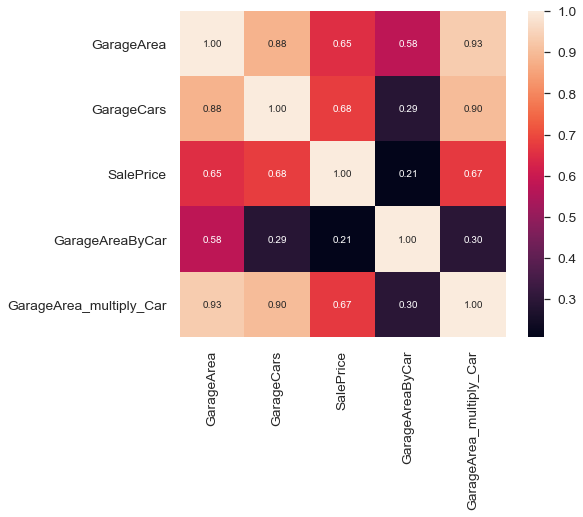

In [70]:
#Plotting heatmap between various Garage features with SalePrice
plt.figure(figsize=(8,6))
sns.heatmap(housing1[['GarageArea','GarageCars','SalePrice','GarageAreaByCar','GarageArea_multiply_Car']].corr(),cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
            )
plt.show()

- __GarageArea__ can be dropped as it is highly correlated with GarageCars and has a lower correlation with SalePrice in comparison with GarageCars.

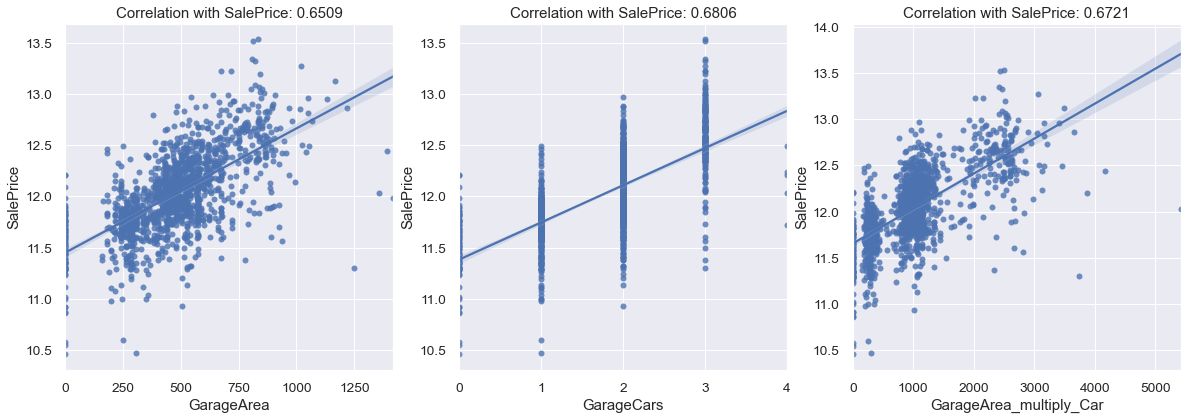

In [71]:
#Plotting Regplot of Garage features with SalePrice
plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.regplot(x='GarageArea',y='SalePrice',data=housing1)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.GarageArea.corr(housing1['SalePrice'])))

plt.subplot(2,3,2)
sns.regplot(x='GarageCars',y='SalePrice',data=housing1)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.GarageCars.corr(housing1['SalePrice'])))

plt.subplot(2,3,3)
sns.regplot(x='GarageArea_multiply_Car',y='SalePrice',data=housing1)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.GarageArea_multiply_Car.corr(housing1['SalePrice'])))

plt.show()

__Based on the EDA and correlation (>0.10) with SalePrice, 15 numerical independent features were selected.__ <br>

_Also, 21 Numerical columns were rejected for future analysis and model building because of :_ <br>
    - Multicollinearity (High Correlation with other existing Independent Feature)
    - Weak Correlation (< 0.10) with SalePrice
    - Feature Engineering (New Feature added with combination other independent features)

| Numerical Raw Features   | Selection/Rejection                                               |
| ------------- |:-------------                                            :| 
| OverallQual          | Selected                                        | 
| GrLivArea         | Selected                         |  
| GarageCars           | Selected                                           | 
| TotalBsmtSF      | Selected                                        |   
| 1stFlrSF| Rejected (correlated with TotalBsmtSF)                                       |
| GarageArea     | Rejected (correlated with GarageCars)|
| FullBath      | Rejected (Added new Feature TotBathrooms)|
| TotRmsAbvGrd         | Rejected (correlated with GrLivArea)|
| YearBuilt        | Rejected (correlated with YearBuiltAge)         |
| YearRemodAdd          | Rejected (correlated with YearRemodAddAge)            |
| MasVnrArea         | Selected                                              |
| Fireplaces        | Selected                                         |
| GarageYrBlt         | Rejected (correlated with GarageYrBltAge)                          |
| BsmtFinSF1           | Selected                     |
| LotFrontage       | Selected                   |
| 2ndFlrSF       | Selected                       |
| OpenPorchSF           | Selected               |
| WoodDeckSF         | Selected            |
| HalfBath      | Rejected (Added new Feature TotBathrooms)   |
| LotArea       | Selected |
|BsmtFullBath   | Rejected (Added new Feature TotBathrooms)  |
|BsmtUnfSF      | Selected |
|BedroomAbvGr   | Selected |
|ScreenPorch    | Selected |
|PoolArea       | Rejected (Weak Correlation) |
|MoSold         | Rejected (Weak Correlation) |
|3SsnPorch      | Rejected (Weak Correlation) |
|BsmtFinSF2     | Rejected (Weak Correlation) |
|BsmtHalfBath   | Rejected (Added new Feature TotBathrooms)  |
|MiscVal        | Rejected (Weak Correlation) |
|LowQualFinSF   | Rejected (Weak Correlation) |
|YrSold         | Rejected (Weak Correlation) |
|OverallCond    | Rejected (Weak Correlation) |
|MSSubClass     | Rejected (Weak Correlation) |
|EnclosedPorch  | Rejected (Weak Correlation) |
|KitchenAbvGr   | Rejected (Weak Correlation)|

__Among the new features added, below are the list of selected and rejected features__ <br/>

Please note that we are also selecting features with weak correlation to SalePrice and will be dropped later if it does not add value to model

| New/Transformed Features   | Selection/Rejection                                               |
| ------------- |:-------------                                            :| 
| TotalArea | Selected |
| TotBathrooms         | Selected |
| IsNew          | Selected                                        | 
| HasPorch         | Selected                         |  
| HasMasVnr           | Selected                                           | 
| HasWoodDeck      | Selected                                        |   
| HasGarage| Selected                                           |
| HasBasement     | Selected|
| Has2ndFloor      | Rejected (correlated with 2ndFlrSF) |
| HasPool         | Selected |
| MasVnrArea_NAN        | Selected             |
| Has3SsnPorch          | Selected             |
| LotFrontage_NAN         | Selected                                              |
| HasMiscFeature        | Selected                                         |
| HasFence         | Selected                          |
| HasAlley         | Selected |
| HasEnclosedPorch           | Selected                     |
| GarageYrBlt_NAN       | Rejected (correlated with HasGarage)                 |
| HasRemod            | Selected |
| YearBuiltAge | Selected |
| YearRemodAddAge | Selected |
| GarageYrBltAge | Selected |
| YearBuilt_multiply_Garage | Selected |
| Garage_Newest_Flg | Selected |
| GarageAreaByCar | Selected |
| GarageArea_multiply_Car | Selected |

__Check any outliers in the above selected Numerical features__

In [72]:
#List out all Selected and Rejected features
selected_num_cols=['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','MasVnrArea','Fireplaces','BsmtFinSF1',
                   'LotFrontage','2ndFlrSF','OpenPorchSF','WoodDeckSF','LotArea','BsmtUnfSF','BedroomAbvGr',
                   'ScreenPorch']

selected_new_features=['TotalArea','TotBathrooms','IsNew','HasPorch','HasMasVnr','HasWoodDeck','HasGarage','HasBasement',
                       'HasPool','MasVnrArea_NAN','Has3SsnPorch','LotFrontage_NAN','HasMiscFeature','HasFence',
                       'HasAlley','HasEnclosedPorch','HasRemod','YearBuiltAge','YearRemodAddAge','GarageYrBltAge',
                       'YearBuilt_multiply_Garage','Garage_Newest_Flg','GarageAreaByCar','GarageArea_multiply_Car']

rejected_num_cols=['1stFlrSF','GarageArea','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd',
                   'GarageYrBlt','BsmtFullBath','PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath',
                    'MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr',
                   'HalfBath']

rejected_new_features=['Has2ndFloor','GarageYrBlt_NAN']

In [73]:
#Checking Outliers at 25%, 50%, 75%, 90%, 95% and 99%
housing[selected_num_cols].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,2ndFlrSF,OpenPorchSF,WoodDeckSF,LotArea,BsmtUnfSF,BedroomAbvGr,ScreenPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,103.685262,0.613014,443.639726,70.049958,346.992466,46.660274,94.244521,10516.828082,567.240411,2.866438,15.060959
std,1.382997,525.480383,0.747315,438.705324,181.066207,0.644666,456.098091,24.284752,436.528436,66.256028,125.338794,9981.264932,441.866955,0.815778,55.757415
min,1.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000
25%,5.000000,1129.500000,1.000000,795.750000,0.000000,0.000000,0.000000,59.000000,0.000000,0.000000,0.000000,7553.500000,223.000000,2.000000,0.000000
50%,6.000000,1464.000000,2.000000,991.500000,0.000000,1.000000,383.500000,69.000000,0.000000,25.000000,0.000000,9478.500000,477.500000,3.000000,0.000000
75%,7.000000,1776.750000,2.000000,1298.250000,166.000000,1.000000,712.250000,80.000000,728.000000,68.000000,168.000000,11601.500000,808.000000,3.000000,0.000000
90%,8.000000,2158.300000,3.000000,1602.200000,335.000000,1.000000,1065.500000,96.000000,954.200000,130.000000,262.000000,14381.700000,1232.000000,4.000000,0.000000
95%,8.000000,2466.100000,3.000000,1753.000000,456.000000,2.000000,1274.000000,107.000000,1141.050000,175.050000,335.000000,17401.150000,1468.000000,4.000000,160.000000
99%,10.000000,3123.480000,3.000000,2155.050000,791.920000,2.000000,1572.410000,141.000000,1418.920000,285.820000,505.460000,37567.640000,1797.050000,5.000000,268.050000


__Checking data spread for sample numerical columns, we can definitely see some outliers in the numerical features like TotalBsmtSF, LotFrontage,
2ndFlrSF, LotArea etc.__

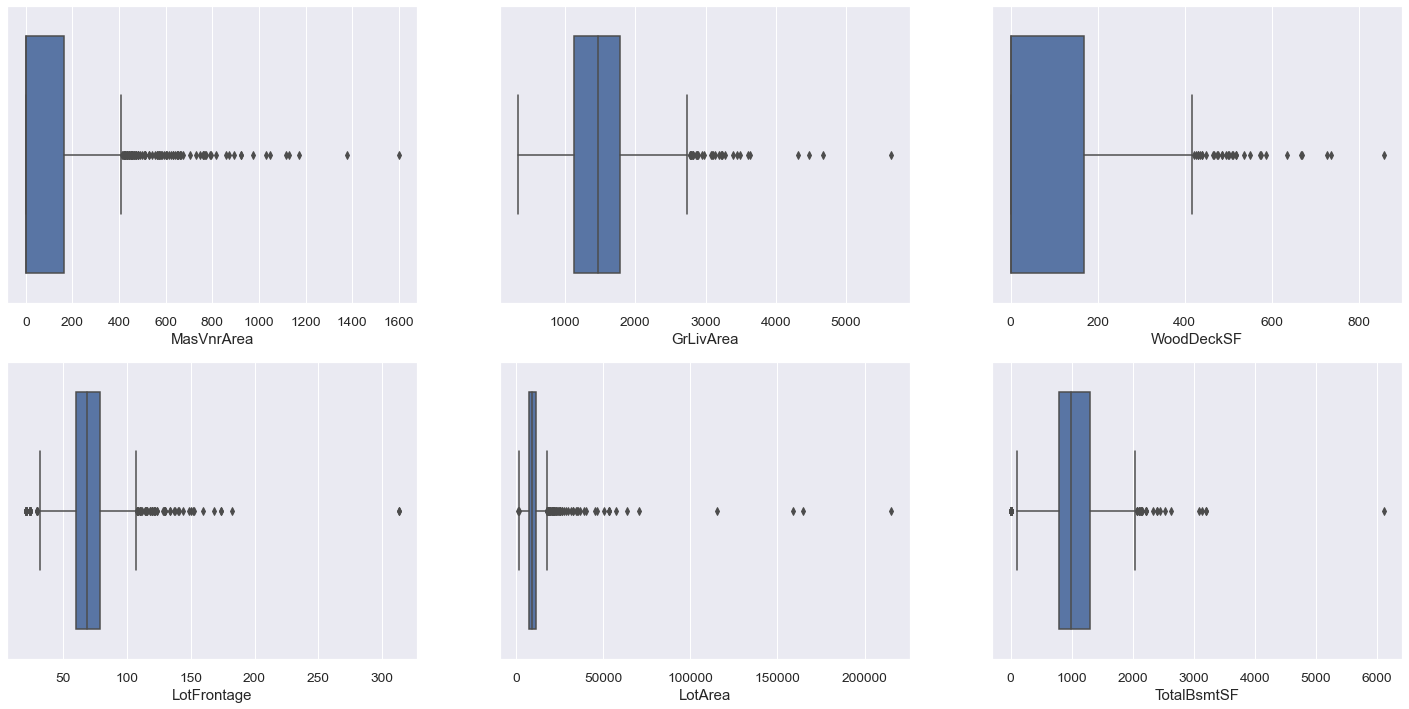

In [74]:
#Plotting boxplot for sample Numerical features to show outliers
plt.figure(figsize=(25, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MasVnrArea',data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'GrLivArea', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'WoodDeckSF', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'LotFrontage', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'LotArea', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'TotalBsmtSF', data = housing1)
plt.show()

### How to deal with Outliers??
 - Manual way (not recommended): Visually inspect the data and remove outliers
 - Recommended way: Use __RobustScaler__ that will just scale the features using statistics that are robust to outliers or use __Min-Max Scaler__ which can rescale the data in range of [0,1] 
 - Use __Automatic Outlier Detection__ like **LOF (Local Outlier Factor)** or **IsolationForest**
 
 We will use the recommended way approach below

<a id=section403></a>
### 4.3 Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [75]:
#Find the Cardinality in the Categorical Features
for x in qual_col:
    print ('The feature is {} and number of categories are {}'.format(x,housing1[x].nunique()))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

**Let's check BoxPlots for Categorical Columns with SalePrice**

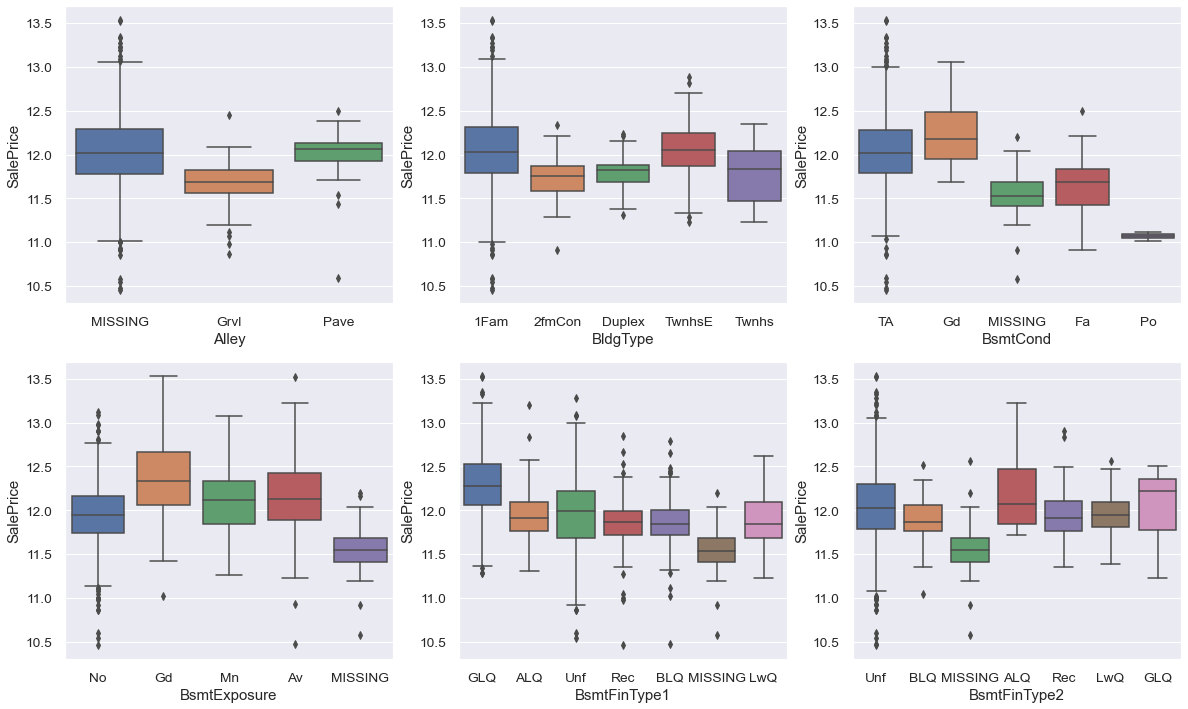

In [76]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = housing1)
plt.show()

- __Missing Value__ in __Alley__ seems to have an impact on the SalePrice
- __Townhouses__ are slightly expensive than other kinds


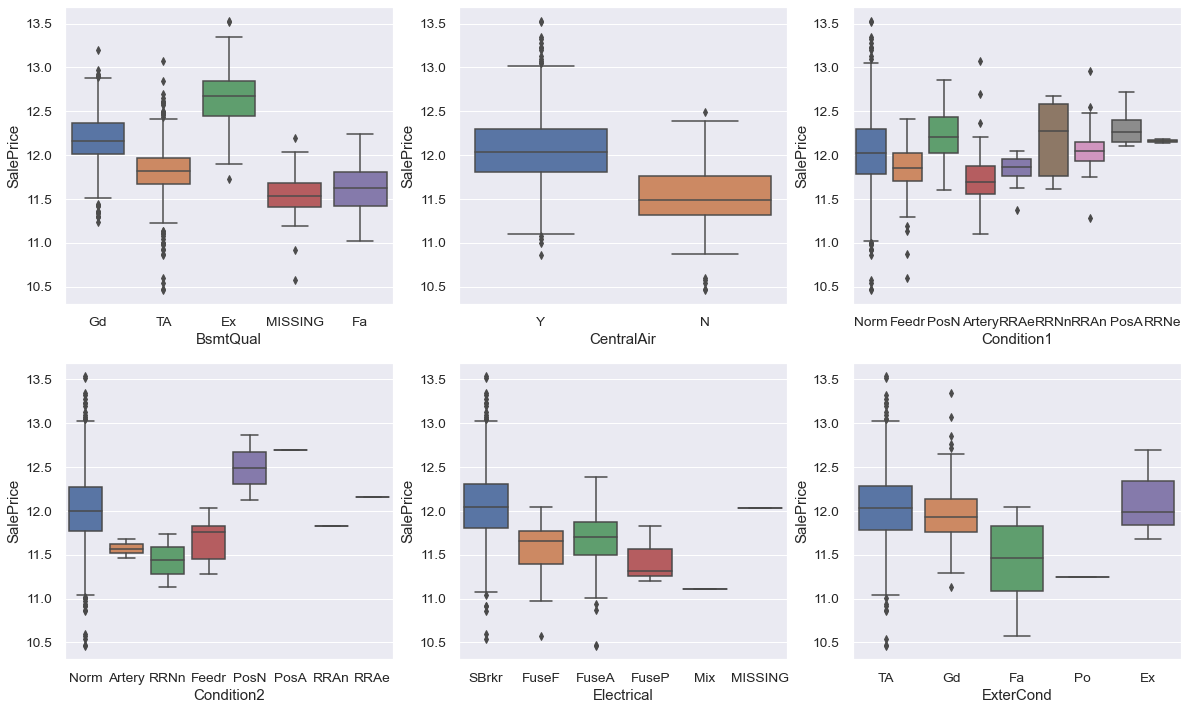

In [77]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = housing1)
plt.show()

- Having __Basement__ especially with __Excellent__ quality does increase the SalePrice significantly
- Having __CentralAir__ have an impact on the SalePrice 

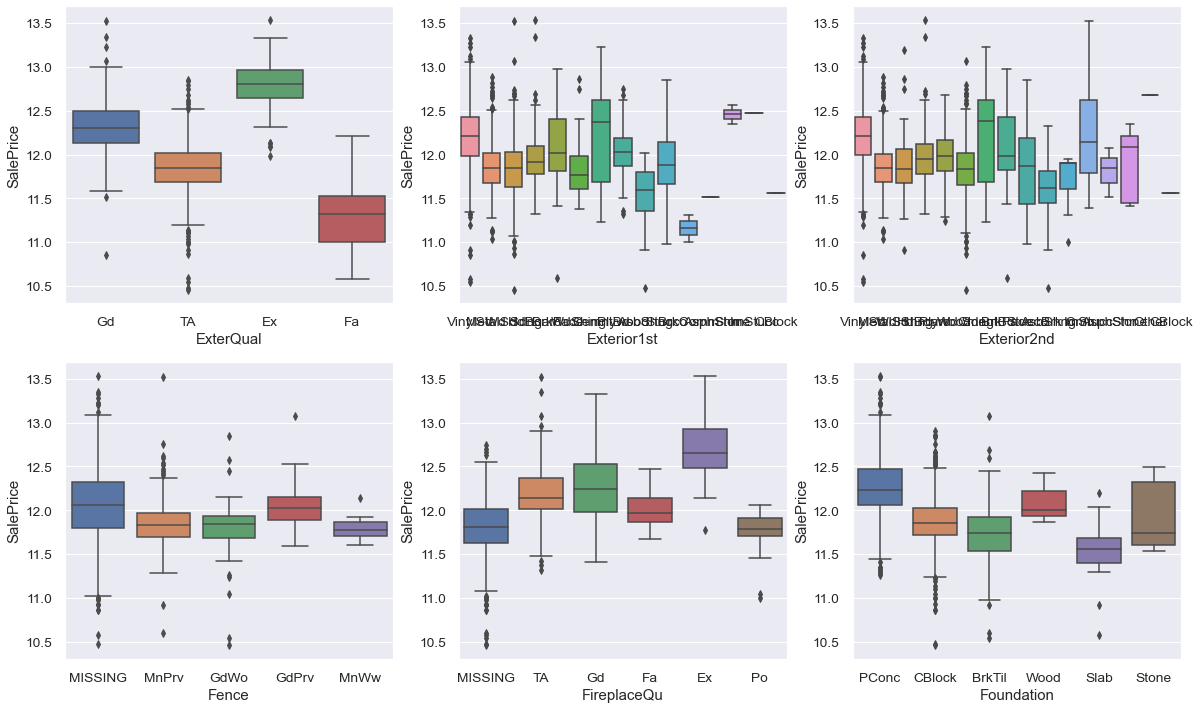

In [78]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing1)
plt.show()

- Having excellent __Exterior material Quality__ and having a  __Fireplace__ does have a signifiant impact on SalePrice

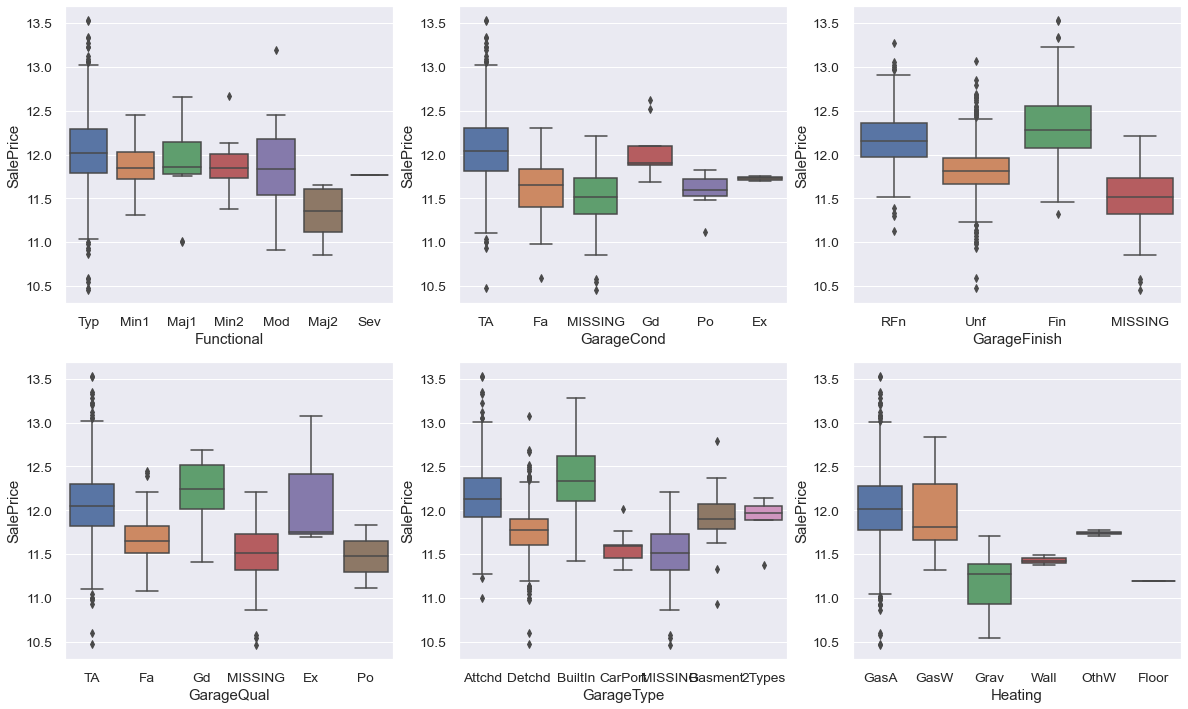

In [79]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = housing1)
plt.show()

- __MISSING__ values in various Garage attributes points to lowest median SalePrice and could be reason because of missing Garage at the Property 

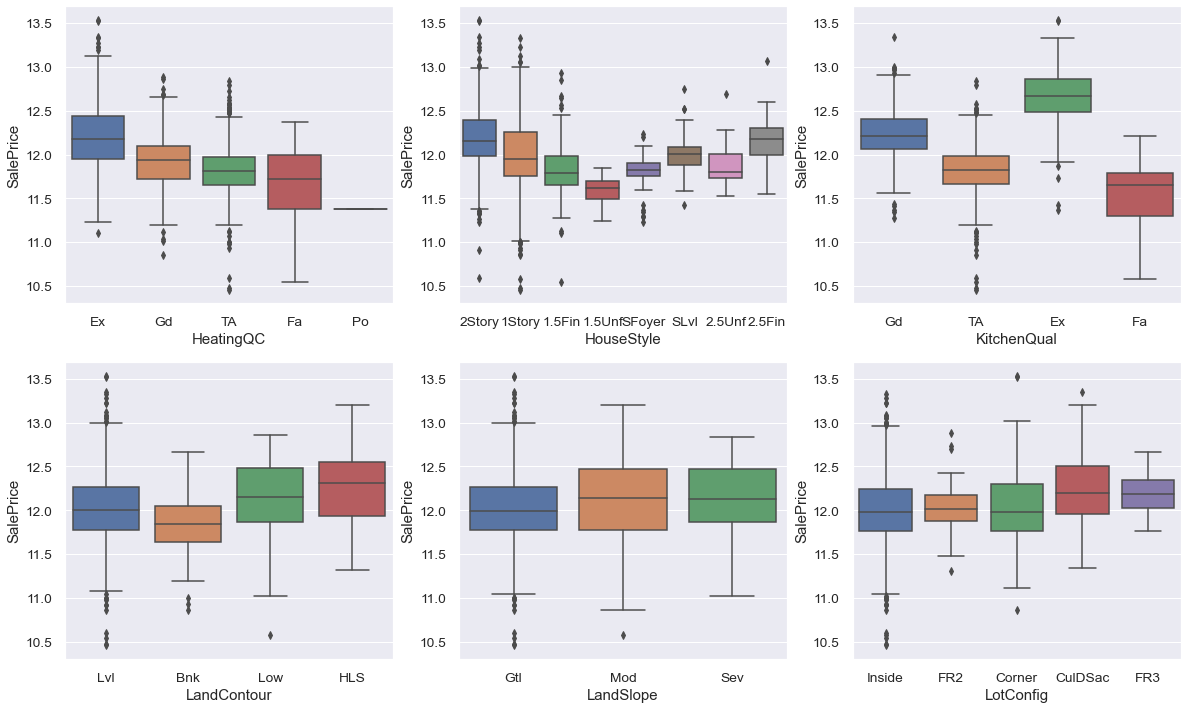

In [80]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = housing1)
plt.show()

- __KitchenQual__ has an impact on the SalePrice

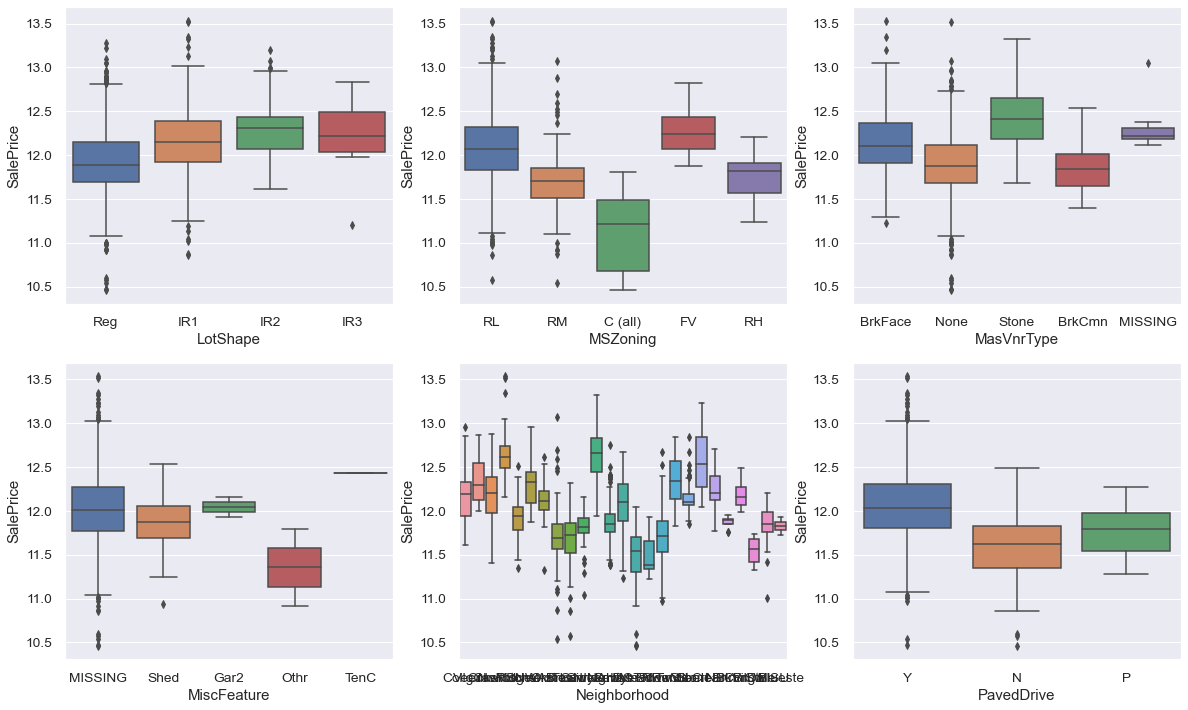

In [81]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = housing1)
plt.show()

- __Neighborhood, MSZoning, MasVnrType__ have an impact on the SalePrice

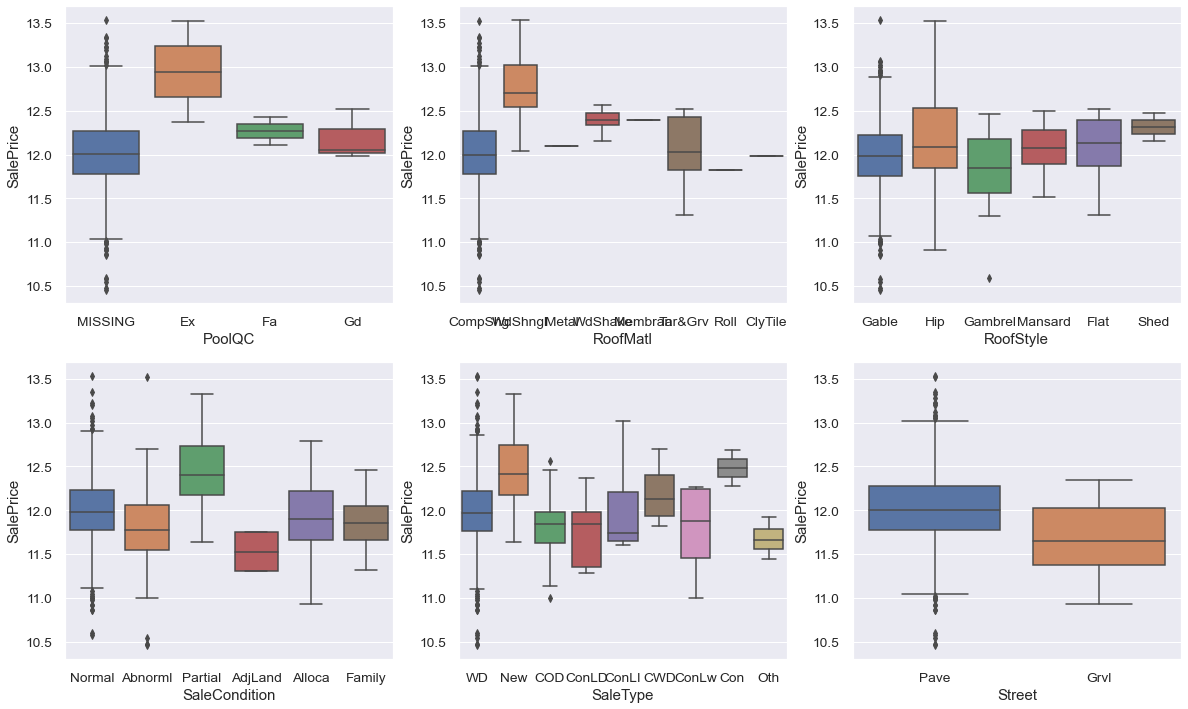

In [82]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'Street', y = 'SalePrice', data = housing1)
plt.show()

- __PoolQC, RoofMatl, SaleCondition, SaleType__ has a __significant__ affect on the SalePrice

Some categories seem to more diverse with respect to SalePrice than others. Neighborhood has big impact on house prices. Having pool on property seems to improve price substantially. There are also differences in variabilities between category values.

__Neighborhood__

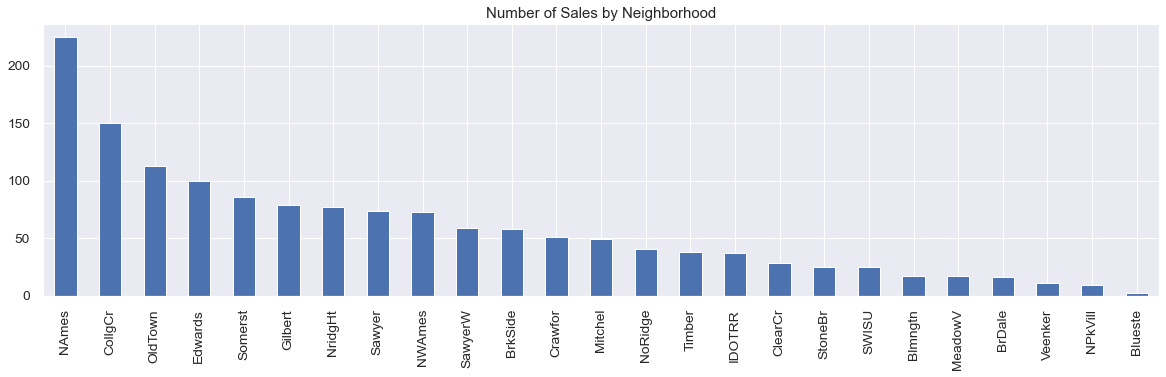

In [83]:
#Check Neighborhood
plt.figure(figsize=(20, 5))
housing1.Neighborhood.value_counts().plot(kind='bar', title='Number of Sales by Neighborhood')
plt.show()

- Prices are affected by the neighborhood

__Utilities__

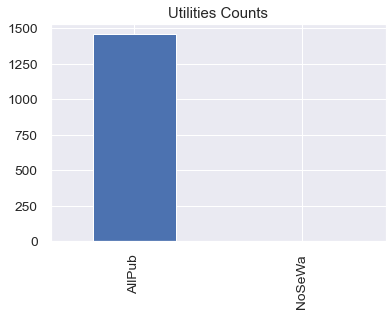

In [84]:
#Check utlities
housing1['Utilities'].value_counts().plot.bar()
plt.title('Utilities Counts')
plt.show()

- For this categorical feature all records are "AllPub", except for one "NoSeWa". This feature won't help in predictive modeling so we can then safely drop it.

<a id=section5></a>
## 5 Data Preparation

- __Handling variables with a clear, ordered relationship (Label Encoding Categorical Features)__ <br>
  In order to fit a regression line, we would need numerical values and not string.
  For these string variables that take on ordinal values or we can easily convert them to a numeric rank.

 For example, the central air variable can be changed to '1' for 'yes' and '0' for 'no.' Similarly, we can do the same with a quality scale. The 'exterior condition' column takes on 5 values with a scale ranging from "poor" to "excellent". These can be converted by assigning each category a numeric value. For example:

 Excellent = 5
Good = 4
TA (typical/average in the data dictionary) = 3
Fair = 2
Poor = 1 
Missing = 0

<br/>

 - __Handling variables without a clear, ordered relationship (One Hot Encode Categorical Features)__ <br>
 Convert Categorial variables to dummy data so that the model can understand the data better
 <br/>
 
 - __Adding new Features identified as part of EDA__
 <br>
 
 - __Dropping Features which are redundant or identfied as of least value to the model as per EDA__

<a id=section501></a>
### 5.1 Label Encoding Categorical Features

In [85]:
#List Ordinal Categorical Features and print their unique values
label_col=['GarageQual','BsmtQual','BsmtCond','HeatingQC','FireplaceQu','GarageCond','KitchenQual','ExterQual',
          'ExterCond','GarageFinish','LandSlope','PavedDrive','LotShape','BsmtFinType1','Functional','CentralAir',
          'Street','BsmtExposure','BsmtFinType2','Fence']
for x in label_col:
    print ('The feature is {} and number of categories are {}'.format(x,housing1[x].unique()))

The feature is GarageQual and number of categories are ['TA' 'Fa' 'Gd' 'MISSING' 'Ex' 'Po']
The feature is BsmtQual and number of categories are ['Gd' 'TA' 'Ex' 'MISSING' 'Fa']
The feature is BsmtCond and number of categories are ['TA' 'Gd' 'MISSING' 'Fa' 'Po']
The feature is HeatingQC and number of categories are ['Ex' 'Gd' 'TA' 'Fa' 'Po']
The feature is FireplaceQu and number of categories are ['MISSING' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
The feature is GarageCond and number of categories are ['TA' 'Fa' 'MISSING' 'Gd' 'Po' 'Ex']
The feature is KitchenQual and number of categories are ['Gd' 'TA' 'Ex' 'Fa']
The feature is ExterQual and number of categories are ['Gd' 'TA' 'Ex' 'Fa']
The feature is ExterCond and number of categories are ['TA' 'Gd' 'Fa' 'Po' 'Ex']
The feature is GarageFinish and number of categories are ['RFn' 'Unf' 'Fin' 'MISSING']
The feature is LandSlope and number of categories are ['Gtl' 'Mod' 'Sev']
The feature is PavedDrive and number of categories are ['Y' 'N' 'P']
The fea

In [86]:
housing_data=housing1.copy()

In [87]:
housing_data.shape

(1460, 107)

In [88]:
# applying label encoding to ordinal categorical columns:
#Excellent = 5 Good = 4 TA (typical/average in the data dictionary) = 3 Fair = 2 Poor = 1 Missing = 0
housing_data['GarageQual'] = housing_data['GarageQual'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtQual'] = housing_data['BsmtQual'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtCond'] = housing_data['BsmtCond'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['HeatingQC'] = housing_data['HeatingQC'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['GarageCond'] = housing_data['GarageCond'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['KitchenQual'] = housing_data['KitchenQual'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['ExterQual'] = housing_data['ExterQual'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['ExterCond'] = housing_data['ExterCond'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

housing_data['CentralAir'] = housing_data['CentralAir'].map({'Y':1,'N':0}) 

#GarageFinish
housing_data['GarageFinish'] = housing_data['GarageFinish'].map(
    {'MISSING':0,    #No garage
     'Unf':1,        #Unfinished
     'RFn':2,        #Rough Finished
     'Fin':3         #Finished
    })

#LandSlope
housing_data['LandSlope'] = housing_data['LandSlope'].map(
    {'Sev':1,       #Severe
     'Mod':2,       #Moderate
     'Gtl':3        #Gentle slope
    })

#PavedDrive
housing_data['PavedDrive'] = housing_data['PavedDrive'].map(
    { 'N':1,         #Dirt/Gravel
     'P':2,         #Partial Pavement
     'Y':3          #Paved
    })  

#Street
housing_data['Street'] = housing_data['Street'].map(
    {'Grvl':1,         #Dirt/Gravel
     'Pave':2         #Paved
    })   


#LotShape
housing_data['LotShape'] = housing_data['LotShape'].map(
    {'IR3':1,       #Irregular
     'IR2':2,       #Moderately irregular
     'IR1':3,       #Slightly Irregular
     'Reg':4        #Regular
    }) 

#BsmtFinType1
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].map(
    {'MISSING':0,  #No Basement
     'Unf':1,      #Unfinished
     'LwQ':2,      #Low Quality
     'Rec':3,      #Average Rec Room
     'BLQ':4,      #Below Average Living Quarter
     'ALQ':5,      #Average Living Quarter
     'GLQ':6       #Good Living Quarter
    })

#BsmtFinType2
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].map(
    {'MISSING':0,  #No Basement
     'Unf':1,      #Unfinished
     'LwQ':2,      #Low Quality
     'Rec':3,      #Average Rec Room
     'BLQ':4,      #Below Average Living Quarter
     'ALQ':5,      #Average Living Quarter
     'GLQ':6       #Good Living Quarter
    })

#Housing Functional types 
housing_data['Functional'] = housing_data['Functional'].map(
    {'Sal':0,     #Salvage only
     'Sev':1,     #Severly Damaged
     'Maj2':2,    #Major Deductions 2
     'Maj1':3,    #Major Deductions 1
     'Mod':4,     #Moderate Deductions
     'Min2':5,    #Minor Deductions 2
     'Min1':6,    #Minor Deductions 1
     'Typ':7      #Typical Functionality
    })

#BsmtExposure
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].map(
    {'MISSING' :0, #No Basement
     'No' :1, #No Exposure
     'Mn' :2, #Minimum Exposure
     'Av' :3, #Average Exposure
     'Gd' :4 #Good Exposure
    })



# Fence: Fence quality
housing_data['Fence'] = housing_data['Fence'].map(
    {'MISSING' :0, #No Basement
     'MnWw' :2, #Minimum Wood/Wire
     'GdWo' :2, #Good Wood
     'MnPrv' :3, #Minimum Privacy
     'GdPrv' :4 #Good Privacy
    })



In [89]:
housing_data[label_col].head()  #Check data after label encoding

,GarageQual,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,GarageCond,KitchenQual,ExterQual,ExterCond,GarageFinish,LandSlope,PavedDrive,LotShape,BsmtFinType1,Functional,CentralAir,Street,BsmtExposure,BsmtFinType2,Fence
0,3,4,3,5,0,3,4,4,3,2,3,3,4,6,7,1,2,1,1,0
1,3,4,3,5,3,3,3,3,3,2,3,3,4,5,7,1,2,4,1,0
2,3,4,3,5,3,3,4,4,3,2,3,3,3,6,7,1,2,2,1,0
3,3,3,4,4,4,3,4,3,3,1,3,3,3,5,7,1,2,1,1,0
4,3,4,3,5,3,3,4,4,3,2,3,3,3,6,7,1,2,3,1,0


In [90]:
housing_data.shape

(1460, 107)

<a id=section502></a>
### 5.2 One Hot Encode Categorical Features

In [91]:
# Let's create dummies and drop the first column from status df using 'drop_first = True'
dummy_qual_col=['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
                'MasVnrType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation',
                'SaleCondition','Heating','Electrical','SaleType','GarageType']
status = pd.get_dummies(housing_data[dummy_qual_col], drop_first = True)

In [92]:
# Add the results to the original housing dataframe

housing_data = pd.concat([housing_data, status], axis = 1)

In [93]:
housing_data.shape

(1460, 247)

<a id=section503></a>
### 5.3 Add/Remove Features

In [94]:
#Adding new feature Total Bathroom
housing_data ['TotBathrooms'] = housing_data.FullBath + (housing_data.HalfBath*0.5) + housing_data.BsmtFullBath + (housing_data.BsmtHalfBath*0.5)


In [95]:
housing_data.shape   #Check Shape

(1460, 248)

In [96]:
#Drop original dummy features
housing_data.drop((dummy_qual_col), axis = 1, inplace = True)

In [97]:
housing_data.shape    #Check Shape

(1460, 229)

In [98]:
# Drop categorical features with too many missing values or irrelevant information
drop_qual_col=['Utilities','Alley','MiscFeature','PoolQC','HasPool']

housing_data.drop((drop_qual_col), axis = 1, inplace = True)

In [99]:
housing_data.shape    #Check Shape

(1460, 224)

In [100]:
housing_data.drop((rejected_num_cols), axis = 1, inplace = True)

In [101]:
housing_data.shape  #Check Shape

(1460, 203)

In [102]:
housing_data.drop((rejected_new_features), axis = 1, inplace = True)

In [103]:
housing_data.shape   #Check Shape

(1460, 201)

In [104]:
housing_data.head() #Check if there are any non-numeric attributes

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,Fence,SalePrice,LotFrontage_NAN,MasVnrArea_NAN,HasBasement,HasGarage,HasMasVnr,HasWoodDeck,HasPorch,Has3SsnPorch,HasEnclosedPorch,HasFence,HasAlley,HasMiscFeature,IsNew,TotalArea,GrLivAreaperRoom,GrLivArea_multiply_Rooms,YearBuiltAge,YearRemodAddAge,GarageYrBltAge,HasRemod,YearBuilt_multiply_Garage,Garage_Newest_Flg,GarageAreaByCar,GarageArea_multiply_Car,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_MISSING,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_MISSING,Electrical_Mix,Electrical_SBrkr,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,TotBathrooms
0,65.0,8450,2,4,3,7,196.0,4,3,4,3,1,6,706,1,150,856,5,1,854,1710,3,4,7,0,0,2,2,3,3,3,0,61,0,0,12.247694,0,0,1,1,1,0,1,0,0,0,0,0,1,3371.0,213.750000,13680,5,5,5.0,0,25.0,0,274.000000,1096,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3.5
1,80.0,9600,2,4,3,6,0.0,3,3,4,3,4,5,978,1,284,1262,5,1,0,1262,3,3,7,1,3,2,2,3,3,3,298,0,0,0,12.109011,0,0,1,1,0,1,0,0,0,0,0,0,0,3282.0,210.333333,7572,31,31,31.0,0,961.0,0,230.000000,920,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1

<a id=section6></a>
## 6 Splitting the Data into Training and Testing Sets

The first basic step for regression is to split the data and perform a train-test split.

<a id=section601></a>
### 6.1 Dividing into X and Y sets for the model building

In [105]:
# splitting into X and y
X = housing_data.drop("SalePrice", axis = 1)
y = housing_data.SalePrice

In [106]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 100)

<a id=section602></a>
### 6.2 Rescaling the Features 

Here we can see that housing dataset has many variables with many ranging integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are many common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 
3. Robust Scaling

Also, Min-Max scaling is __highly influenced__ by the maximum and minimum values in our data so if our data contains __outliers__ it is going to be __biased__.

So, we will go with __RobustScaler__ which uses __median__ values unlike __StandardScaler__ which uses __mean__ and because we have seen outliers in our data and it will help to scale the features using statistics that are robust to outliers.


In [107]:
from sklearn.preprocessing import RobustScaler

In [108]:
scaler = RobustScaler()

In [109]:
# Apply scaler() to Train data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,Fence,LotFrontage_NAN,MasVnrArea_NAN,HasBasement,HasGarage,HasMasVnr,HasWoodDeck,HasPorch,Has3SsnPorch,HasEnclosedPorch,HasFence,HasAlley,HasMiscFeature,IsNew,TotalArea,GrLivAreaperRoom,GrLivArea_multiply_Rooms,YearBuiltAge,YearRemodAddAge,GarageYrBltAge,HasRemod,YearBuilt_multiply_Garage,Garage_Newest_Flg,GarageAreaByCar,GarageArea_multiply_Car,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_MISSING,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_MISSING,Electrical_Mix,Electrical_SBrkr,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,TotBathrooms
0,2.157895,1.137586,0.0,0.0,0.0,1.0,2.34375,1.0,0.0,0.0,0.0,1.333333,-0.6,-0.554017,0.0,2.495770,1.837095,-0.5,0.0,0.000000,0.785937,0.0,1.0,0.0,0.0,0.50,1.0,1.0,0.0,0.0,0.0,1.875000,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.759583,-0.130791,1.295777,-0.723404,-0.388889,-0.710526,0.0,-0.410783,0.0,0.562827,2.113971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.

In [110]:
X_train.shape   #Check shape of train dataset

(1095, 200)

In [111]:
# Apply scaler() to Test data
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,Fence,LotFrontage_NAN,MasVnrArea_NAN,HasBasement,HasGarage,HasMasVnr,HasWoodDeck,HasPorch,Has3SsnPorch,HasEnclosedPorch,HasFence,HasAlley,HasMiscFeature,IsNew,TotalArea,GrLivAreaperRoom,GrLivArea_multiply_Rooms,YearBuiltAge,YearRemodAddAge,GarageYrBltAge,HasRemod,YearBuilt_multiply_Garage,Garage_Newest_Flg,GarageAreaByCar,GarageArea_multiply_Car,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_MISSING,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_MISSING,Electrical_Mix,Electrical_SBrkr,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,TotBathrooms
0,-0.473684,-0.139541,0.0,0.0,0.0,-1.0,0.0000,0.0,0.0,-1.0,0.0,0.000000,0.2,0.299169,0.0,-0.358714,-0.264966,-1.0,0.0,0.000000,-0.946875,0.0,0.0,0.0,-1.0,-0.50,-1.0,0.0,0.0,0.0,0.0,0.000000,-0.342857,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.683290,-0.926032,-0.720126,0.021277,0.583333,0.131579,0.0,0.097133,0.0,0.023560,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [112]:
X_test.shape   #Check shape of test dataset

(365, 200)

<a id=section7></a>

## 7 RFE (Recursive feature elimination)

- The goal of Recursive Feature Elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

- RFE is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted.

In [113]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [114]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [115]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 109),
 ('LotArea', False, 127),
 ('Street', False, 24),
 ('LotShape', False, 160),
 ('LandSlope', False, 132),
 ('OverallQual', True, 1),
 ('MasVnrArea', False, 90),
 ('ExterQual', False, 167),
 ('ExterCond', False, 136),
 ('BsmtQual', False, 72),
 ('BsmtCond', False, 45),
 ('BsmtExposure', False, 50),
 ('BsmtFinType1', False, 67),
 ('BsmtFinSF1', False, 11),
 ('BsmtFinType2', False, 165),
 ('BsmtUnfSF', False, 128),
 ('TotalBsmtSF', False, 117),
 ('HeatingQC', False, 60),
 ('CentralAir', True, 1),
 ('2ndFlrSF', False, 121),
 ('GrLivArea', False, 10),
 ('BedroomAbvGr', False, 139),
 ('KitchenQual', False, 108),
 ('Functional', False, 35),
 ('Fireplaces', False, 66),
 ('FireplaceQu', False, 122),
 ('GarageFinish', False, 146),
 ('GarageCars', False, 154),
 ('GarageQual', False, 38),
 ('GarageCond', False, 87),
 ('PavedDrive', False, 85),
 ('WoodDeckSF', False, 150),
 ('OpenPorchSF', False, 157),
 ('ScreenPorch', False, 168),
 ('Fence', False, 101),
 ('LotFrontage

In [116]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'CentralAir', 'TotalArea', 'YearRemodAddAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Veenker',
       'Condition2_PosN', 'BldgType_Twnhs', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Foundation_Stone',
       'Foundation_Wood', 'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'Electrical_MISSING', 'SaleType_CWD',
       'SaleType_ConLD'],
      dtype='object')

<a id=section8></a>
## 8 Building a Regularized model

Let's now try predicting house prices with ridge, lasso and elasticnet regression.

<a id=section801></a>
### 8.1 Ridge Regression

In [117]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [118]:
X_train_rfe.shape

(1095, 30)

In [119]:
from sklearn.model_selection import GridSearchCV
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,50,100]}

#params = {'alpha': [1,5,8,9,10,15,20,25,30,50,100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# perform the search
model_cv.fit(X_train_rfe, y_train) 
# summarize
#print('MAE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [120]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 9.0}
-0.1067450168928391


In [121]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003339,0.000752,0.001958,0.000221,0.0001,{'alpha': 0.0001},-0.093762,-0.126897,-0.118616,-0.114356,-0.097956,-0.110317,0.012545,24,-0.096611,-0.094370,-0.093566,-0.096418,-0.095679,-0.095329,0.001182
1,0.005561,0.004111,0.001912,0.000272,0.001,{'alpha': 0.001},-0.093777,-0.126772,-0.118615,-0.114235,-0.097943,-0.110268,0.012503,23,-0.096642,-0.094392,-0.093567,-0.096443,-0.095718,-0.095352,0.001191
2,0.003516,0.000956,0.001757,0.000200,0.01,{'alpha': 0.01},-0.093941,-0.125602,-0.118608,-0.113229,-0.097819,-0.109840,0.012117,22,-0.096931,-0.094608,-0.093578,-0.096707,-0.096087,-0.095582,0.001289
3,0.002872,0.000126,0.001808,0.000220,0.05,{'alpha': 0.05},-0.094709,-0.121685,-0.118577,-0.110585,-0.098319,-0.108775,0.010707,20,-0.097981,-0.095437,-0.093632,-0.097743,-0.097388,-0.096436,0.001665
4,0.005618,0.003120,0.002379,0.001049,0.1,{'alpha': 0.1},-0.095419,-0.118705,-0.118540,-0.108645,-0.099020,-0.108066,0.009644,19,-0.099015,-0.096267,-0.093703,-0.098695,-0.098518,-0.097239,0.002018


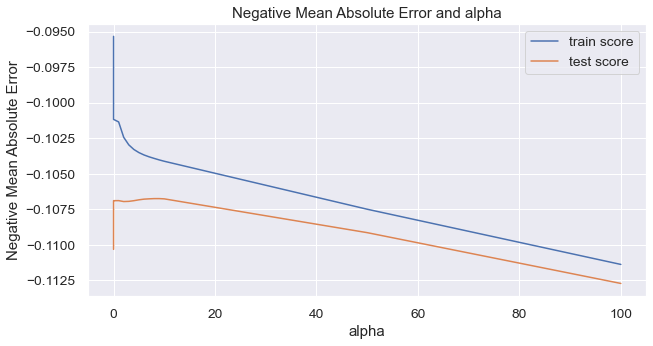

In [122]:
plt.figure(figsize=(10,5))
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [123]:
#Fit the Model again with Optimal alpha value
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 2.04335255e-01,  1.20325009e-01,  1.97492571e-01, -1.15927072e-01,
        1.03898512e-01,  4.18507562e-02,  1.09409882e-01, -2.69931862e-02,
        1.06453076e-01,  1.28967595e-01,  6.95228761e-02, -1.40585540e-01,
       -8.35911496e-02,  7.22605829e-02,  1.60748467e-02,  1.58163373e-02,
       -1.86935694e-04,  4.48228340e-02,  4.36593499e-02,  5.10266915e-02,
       -5.47310214e-02,  8.98827176e-02,  2.38918290e-02, -1.87190747e-02,
        2.57916395e-02,  7.37125261e-02,  8.67870699e-02,  1.72478279e-02,
        3.54204547e-02,  2.45810622e-02])

In [124]:
RidgeDF= pd.DataFrame({
     'Features':X_train_rfe.columns,
    'Coeffecient':ridge.coef_
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')
RidgeDF

,Features,Coeffecient
0,OverallQual,0.200000
2,TotalArea,0.200000
9,Neighborhood_Crawfor,0.130000
1,CentralAir,0.120000
6,MSZoning_RL,0.110000
8,Neighborhood_ClearCr,0.110000
4,MSZoning_FV,0.100000
26,SaleCondition_Partial,0.090000
21,Exterior1st_BrkFace,0.090000
13,RoofMatl_CompShg,0.070000


In [125]:
X_train_rfe1=X_train_rfe.drop(['RoofMatl_Roll'],axis=1) #Drop Feature with coefficient 0


In [126]:
from sklearn.model_selection import GridSearchCV
# list of alphas to tune
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

params = {'alpha': [1,2,3,4,5,6,7,8,9,10,12,15,20,50]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# perform the search
model_cv.fit(X_train_rfe1, y_train) 
# summarize
#print('MAE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20,
                                   50]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 9}
-0.10674430484489292


In [128]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003671,0.001179,0.001849,0.000142,1,{'alpha': 1},-0.098935,-0.110288,-0.118020,-0.103637,-0.103071,-0.106790,0.006691,6,-0.103992,-0.101431,-0.095161,-0.102591,-0.104037,-0.101443,0.003286
1,0.005772,0.005668,0.002255,0.000462,2,{'alpha': 2},-0.099448,-0.109442,-0.117746,-0.103634,-0.104296,-0.106913,0.006278,10,-0.105191,-0.102882,-0.095848,-0.103229,-0.105186,-0.102467,0.003446
2,0.003293,0.000653,0.001753,0.000091,3,{'alpha': 3},-0.099651,-0.109132,-0.117493,-0.103633,-0.104686,-0.106919,0.006088,11,-0.105845,-0.103546,-0.096282,-0.103522,-0.105716,-0.102982,0.003498
3,0.003501,0.000746,0.001946,0.000580,4,{'alpha': 4},-0.099707,-0.108962,-0.117328,-0.103588,-0.104817,-0.106880,0.006001,9,-0.106235,-0.103958,-0.096616,-0.103668,-0.106027,-0.103301,0.003501
4,0.005796,0.002498,0.002197,0.000441,5,{'alpha': 5},-0.099712,-0.108860,-0.117182,-0.103529,-0.104830,-0.106822,0.005947,7,-0.106511,-0.104217,-0.096872,-0.103757,-0.106236,-0.103518,0.003495


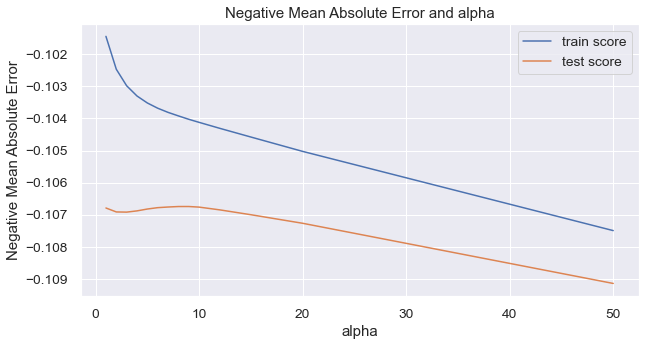

In [129]:
plt.figure(figsize=(10,5))
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [130]:
#Fit the Model again with Optimal alpha value
alpha = 9
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe1, y_train)
ridge.coef_

array([ 0.20433554,  0.12032453,  0.19749243, -0.11592755,  0.10389831,
        0.04185078,  0.10940985, -0.02699305,  0.10645442,  0.12896772,
        0.06952314, -0.14058553, -0.08359119,  0.07226906,  0.01607554,
        0.01581708,  0.04482614,  0.04366188,  0.05102966, -0.05473048,
        0.08988303,  0.02389178, -0.01871908,  0.02579156,  0.0737122 ,
        0.0867867 ,  0.01724782,  0.03542039,  0.02458109])

In [131]:
#Fit the Model again with double alpha value
alpha = 18
ridge_dbl = Ridge(alpha=alpha)
ridge_dbl.fit(X_train_rfe1, y_train)
ridge_dbl.coef_

array([ 0.20391426,  0.11021791,  0.19681088, -0.11611955,  0.07231627,
        0.01783254,  0.0870938 , -0.04990222,  0.08101168,  0.10783258,
        0.04893637, -0.0735235 , -0.06913104,  0.04079463,  0.00812298,
        0.00797094,  0.0199533 ,  0.02085662,  0.02701916, -0.0315488 ,
        0.07735227,  0.01269787, -0.01073657,  0.01372374,  0.06407032,
        0.07191228,  0.00900827,  0.02097251,  0.01208825])

In [132]:
#Check Features with optimal alpha  value
RidgeDF= pd.DataFrame({
     'Features':X_train_rfe1.columns,
    'Coeffecient':ridge.coef_,
    'abs':np.abs(ridge.coef_)
}).round(decimals=3).sort_values('abs',ascending=False).style.bar(color=['grey','lightblue'],align='zero')
RidgeDF

,Features,Coeffecient,abs
0,OverallQual,0.204000,0.204000
2,TotalArea,0.197000,0.197000
11,Condition2_PosN,-0.141000,0.141000
9,Neighborhood_Crawfor,0.129000,0.129000
1,CentralAir,0.120000,0.120000
3,YearRemodAddAge,-0.116000,0.116000
6,MSZoning_RL,0.109000,0.109000
8,Neighborhood_ClearCr,0.106000,0.106000
4,MSZoning_FV,0.104000,0.104000
20,Exterior1st_BrkFace,0.090000,0.090000


In [133]:
#Check Features with double alpha  value
RidgeDF1= pd.DataFrame({
     'Features':X_train_rfe1.columns,
    'Coeffecient':ridge_dbl.coef_,
    'abs':np.abs(ridge_dbl.coef_)
}).round(decimals=3).sort_values('abs',ascending=False).style.bar(color=['grey','lightblue'],align='zero')
RidgeDF1

,Features,Coeffecient,abs
0,OverallQual,0.204000,0.204000
2,TotalArea,0.197000,0.197000
3,YearRemodAddAge,-0.116000,0.116000
1,CentralAir,0.110000,0.110000
9,Neighborhood_Crawfor,0.108000,0.108000
6,MSZoning_RL,0.087000,0.087000
8,Neighborhood_ClearCr,0.081000,0.081000
20,Exterior1st_BrkFace,0.077000,0.077000
11,Condition2_PosN,-0.074000,0.074000
4,MSZoning_FV,0.072000,0.072000


In [134]:
#Predict Train data
y_train_price_rfe = ridge.predict(X_train_rfe1)

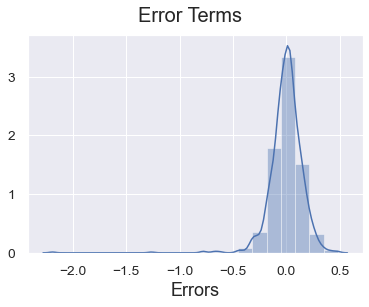

In [135]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [136]:
# calculate these metrics by hand for Training Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_train_price_rfe))
print('MSE:', metrics.mean_squared_error(y_train, y_train_price_rfe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_price_rfe)))

MAE: 0.10399000616534435
MSE: 0.024530912665375593
RMSE: 0.15662347418371103


In [137]:
#Check the R-2 Score on training
from sklearn.metrics import r2_score
r2_score(y_train, y_train_price_rfe)

0.8423400397680242

In [138]:
X_test_rfe=X_test[X_train_rfe1.columns]

In [139]:
# Making predictions using the Lasso model

y_pred_rfe = ridge.predict(X_test_rfe)

In [140]:
# calculate these metrics by hand for Testing Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rfe))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rfe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe)))

MAE: 0.10581597513233568
MSE: 0.022665634706896406
RMSE: 0.15055110330680546


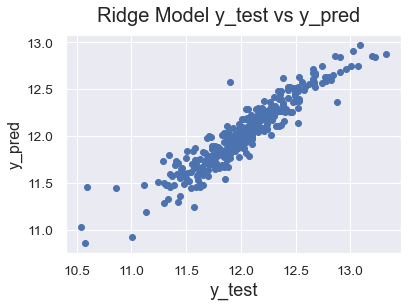

In [141]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_rfe)
fig.suptitle('Ridge Model y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     # Plotting y_test and y_pred to understand the spread
plt.show()

In [142]:
#Check the R-2 Score on testing dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rfe)

0.867474556499966

<a id=section802></a>
### 8.2 LASSO Regression

In [143]:
#Run Lasso Regression
lasso = Lasso()
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
#0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
#4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
params = {'alpha': [0.00001,0.00005,0.00009,0.0001,0.0002,0.0005, 0.001,0.002,0.003,0.004,0.005,0.01]}


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',
                        #scoring=list(['neg_mean_squared_error' , 'neg_mean_absolute_error', 'r2']) , 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 9e-05, 0.0001, 0.0002, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.10703347633798037


In [145]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007345,0.000837,0.002086,0.000108,1e-05,{'alpha': 1e-05},-0.093828,-0.126465,-0.118650,-0.113832,-0.097925,-0.110140,0.012392,8,-0.096723,-0.094425,-0.093578,-0.096507,-0.095833,-0.095413,0.001219
1,0.007765,0.002347,0.003245,0.002406,5e-05,{'alpha': 5e-05},-0.094177,-0.124683,-0.118692,-0.112041,-0.097892,-0.109497,0.011756,7,-0.097209,-0.094700,-0.093655,-0.096957,-0.096526,-0.095809,0.001390
2,0.006479,0.000564,0.002060,0.000116,9e-05,{'alpha': 9e-05},-0.094671,-0.122932,-0.118647,-0.110748,-0.098382,-0.109076,0.011029,6,-0.097790,-0.095118,-0.093778,-0.097478,-0.097326,-0.096298,0.001576
3,0.011035,0.008006,0.002987,0.001949,0.0001,{'alpha': 0.0001},-0.094795,-0.122497,-0.118621,-0.110434,-0.098565,-0.108982,0.010840,5,-0.097961,-0.095242,-0.093817,-0.097627,-0.097547,-0.096439,0.001629
4,0.005713,0.000225,0.002641,0.001300,0.0002,{'alpha': 0.0002},-0.096333,-0.118570,-0.118427,-0.107981,-0.100828,-0.108428,0.009023,4,-0.100118,-0.096611,-0.094331,-0.099347,-0.100148,-0.098111,0.002291
5,0.003520,0.001043,0.001736,0.000332,0.0005,{'alpha': 0.0005},-0.099252,-0.108845,-0.118577,-0.104766,-0.105002,-0.107288,0.006419,2,-0.105131,-0.102723,-0.095674,-0.104440,-0.104832,-0.102560,0.003543
6,0.002615,0.000143,0.001409,0.000031,0.001,{'alpha': 0.001},-0.099735,-0.108528,-0.117758,-0.104169,-0.104978,-0.107033,0.006049,1,-0.106842,-0.104350,-0.097026,-0.104647,-0.106377,-0.103848,0.003544
7,0.002615,0.000126,0.001432,0.000088,0.002,{'alpha': 0.002},-0.101597,-0.111580,-0.117404,-0.104792,-0.105880,-0.108251,0.005598,3,-0.109831,-0.106588,-0.100179,-0.105501,-0.108602,-0.106140,0.003341
8,0.002894,0.000458,0.001685,0.000358,0.003,{'alpha': 0.003},-0.104792,-0.114667,-0.118009,-0.106367,-0.107396,-0.110246,0.005152,9,-0.112039,-0.108785,-0.101988,-0.107550,-0.110634,-0.108199,0.003464
9,0.002869,0.000792,0.001555,0.000188,0.004,{'alpha': 0.004},-0.106872,-0.116682,-0.118095,-0.107364,-0.107837,-0.111370,0.004944,10,-0.113499,-0.110166,-0.103070,-0.108918,-0.111763,-0.109483,0.003556


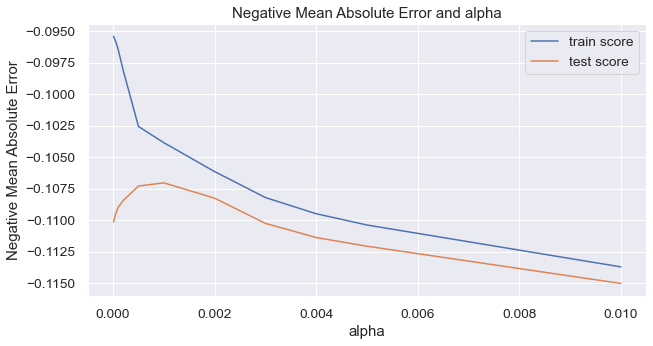

In [146]:
plt.figure(figsize=(10,5))
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [147]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.001)

In [148]:
lasso.coef_

array([ 0.20688644,  0.11675664,  0.19853578, -0.11632933,  0.10333159,
        0.        ,  0.1136077 , -0.01807293,  0.0927324 ,  0.13193691,
        0.02620622, -0.31660533, -0.07588819,  0.00979512,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.08538809,  0.        , -0.        ,  0.        ,
        0.06202767,  0.07071462,  0.        ,  0.        ,  0.        ])

In [149]:
LassoDF= pd.DataFrame({
     'Features':X_train_rfe.columns,
    'Coeffecient':lasso.coef_
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')
LassoDF

,Features,Coeffecient
0,OverallQual,0.210000
2,TotalArea,0.200000
9,Neighborhood_Crawfor,0.130000
1,CentralAir,0.120000
6,MSZoning_RL,0.110000
4,MSZoning_FV,0.100000
8,Neighborhood_ClearCr,0.090000
21,Exterior1st_BrkFace,0.090000
26,SaleCondition_Partial,0.070000
25,SaleCondition_Normal,0.060000


In [150]:
upd_cols=['TotalArea','OverallQual','Neighborhood_Crawfor','MSZoning_RL','CentralAir','MSZoning_FV',
          'Neighborhood_ClearCr','Exterior1st_BrkFace','SaleCondition_Partial','SaleCondition_Normal',
          'Neighborhood_Veenker','RoofMatl_CompShg','MSZoning_RM','BldgType_Twnhs','YearRemodAddAge',
          'Condition2_PosN']
X_train_rfe1=X_train_rfe[upd_cols]


In [151]:
#Hyperparameter Tuning
params = {'alpha': [0.00001, 0.00005, 0.0001,0.0002,0.0005, 0.001,0.002,0.003,0.004,0.005,0.01]}


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',
                        #scoring=list(['neg_mean_squared_error' , 'neg_mean_absolute_error', 'r2']) , 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe1, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.001),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0005, 0.001,
                                   0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [152]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0005}
-0.10679482402184479


In [153]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003334,0.000436,0.001881,0.000316,1e-05,{'alpha': 1e-05},-0.099867,-0.108015,-0.120389,-0.104631,-0.104525,-0.107485,0.006953,6,-0.105276,-0.103445,-0.095448,-0.105408,-0.104915,-0.102898,0.003790
1,0.005351,0.004094,0.001930,0.000268,5e-05,{'alpha': 5e-05},-0.099811,-0.107928,-0.120134,-0.104564,-0.104484,-0.107384,0.006878,5,-0.105283,-0.103442,-0.095457,-0.105339,-0.104928,-0.102890,0.003780
2,0.003848,0.001145,0.001799,0.000062,0.0001,{'alpha': 0.0001},-0.099742,-0.107820,-0.119818,-0.104480,-0.104443,-0.107260,0.006785,4,-0.105294,-0.103443,-0.095486,-0.105252,-0.104956,-0.102886,0.003762
3,0.002684,0.000221,0.001720,0.000277,0.0002,{'alpha': 0.0002},-0.099603,-0.107662,-0.119398,-0.104296,-0.104360,-0.107064,0.006680,3,-0.105346,-0.103455,-0.095571,-0.105117,-0.105020,-0.102902,0.003726
4,0.005974,0.007077,0.002095,0.001331,0.0005,{'alpha': 0.0005},-0.099469,-0.107613,-0.118704,-0.103889,-0.104299,-0.106795,0.006494,1,-0.105723,-0.103602,-0.095973,-0.104778,-0.105333,-0.103082,0.003626
5,0.002888,0.000677,0.001964,0.001083,0.001,{'alpha': 0.001},-0.099767,-0.108562,-0.117764,-0.104167,-0.104978,-0.107048,0.006045,2,-0.106898,-0.104413,-0.097023,-0.104647,-0.106377,-0.103871,0.003556
6,0.002535,0.000102,0.001582,0.000136,0.002,{'alpha': 0.002},-0.101597,-0.111580,-0.117403,-0.104792,-0.105879,-0.108250,0.005598,7,-0.109831,-0.106588,-0.100179,-0.105502,-0.108602,-0.106140,0.003341
7,0.002661,0.000275,0.001531,0.000140,0.003,{'alpha': 0.003},-0.104792,-0.114668,-0.118010,-0.106367,-0.107395,-0.110246,0.005153,8,-0.112039,-0.108785,-0.101988,-0.107550,-0.110634,-0.108199,0.003464
8,0.004263,0.003083,0.003500,0.003605,0.004,{'alpha': 0.004},-0.106872,-0.116681,-0.118095,-0.107364,-0.107837,-0.111370,0.004944,9,-0.113499,-0.110166,-0.103070,-0.108918,-0.111763,-0.109483,0.003556
9,0.002383,0.000078,0.001606,0.000163,0.005,{'alpha': 0.005},-0.107972,-0.117549,-0.118485,-0.108131,-0.108160,-0.112059,0.004874,10,-0.113977,-0.111055,-0.104038,-0.109927,-0.112888,-0.110377,0.003467


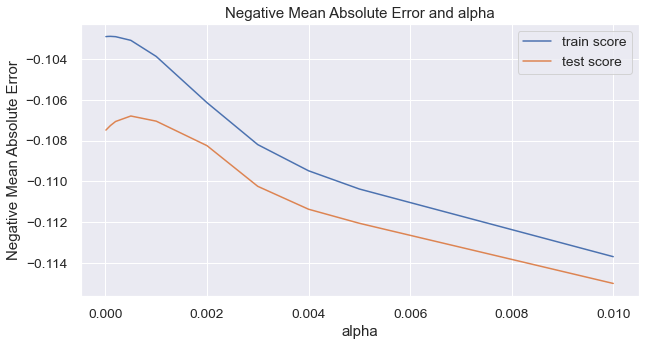

In [154]:
plt.figure(figsize=(10,5))
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [155]:
alpha =0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe1, y_train) 

Lasso(alpha=0.0005)

In [156]:
lasso.coef_

array([ 0.2038803 ,  0.20330914,  0.14703258,  0.13095154,  0.12107736,
        0.13483293,  0.12680012,  0.09370035,  0.09139755,  0.07133763,
        0.07806281,  0.05614319, -0.        , -0.09056115, -0.11444638,
       -0.89374354])

In [157]:
LassoDF= pd.DataFrame({
     'Features':X_train_rfe1.columns,
    'Coeffecient':lasso.coef_
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')
LassoDF

,Features,Coeffecient
0,TotalArea,0.200000
1,OverallQual,0.200000
2,Neighborhood_Crawfor,0.150000
3,MSZoning_RL,0.130000
5,MSZoning_FV,0.130000
6,Neighborhood_ClearCr,0.130000
4,CentralAir,0.120000
7,Exterior1st_BrkFace,0.090000
8,SaleCondition_Partial,0.090000
10,Neighborhood_Veenker,0.080000


In [158]:
X_train_rfe1=X_train_rfe1.drop(['MSZoning_RM'],axis=1) #drop the insignificant feature

In [159]:
#Hyperparameter Tuning
params = {'alpha': [0.00001, 0.00005, 0.0001,0.0002,0.0005, 0.001,0.002,0.003,0.004,0.005,0.01]}


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',
                        #scoring=list(['neg_mean_squared_error' , 'neg_mean_absolute_error', 'r2']) , 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe1, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0005),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0005, 0.001,
                                   0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [160]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0005}
-0.10670279294741034


In [161]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002982,0.000107,0.002442,0.001430,1e-05,{'alpha': 1e-05},-0.099584,-0.107954,-0.119806,-0.104775,-0.104192,-0.107262,0.006818,6,-0.105288,-0.103473,-0.095463,-0.105408,-0.104969,-0.102920,0.003792
1,0.004025,0.000831,0.002781,0.001715,5e-05,{'alpha': 5e-05},-0.099564,-0.107878,-0.119698,-0.104674,-0.104146,-0.107192,0.006792,5,-0.105295,-0.103468,-0.095473,-0.105338,-0.104983,-0.102911,0.003782
2,0.003108,0.000420,0.002235,0.000861,0.0001,{'alpha': 0.0001},-0.099539,-0.107782,-0.119573,-0.104548,-0.104096,-0.107108,0.006764,4,-0.105307,-0.103464,-0.095501,-0.105254,-0.105014,-0.102908,0.003765
3,0.002757,0.000300,0.001667,0.000121,0.0002,{'alpha': 0.0002},-0.099489,-0.107647,-0.119323,-0.104296,-0.103996,-0.106950,0.006708,3,-0.105353,-0.103466,-0.095578,-0.105117,-0.105091,-0.102921,0.003733
4,0.002500,0.000115,0.001558,0.000024,0.0005,{'alpha': 0.0005},-0.099469,-0.107613,-0.118704,-0.103889,-0.103839,-0.106703,0.006532,1,-0.105723,-0.103602,-0.095972,-0.104778,-0.105416,-0.103098,0.003636
5,0.003639,0.001334,0.002625,0.000925,0.001,{'alpha': 0.001},-0.099767,-0.108569,-0.117788,-0.104112,-0.104111,-0.106869,0.006128,2,-0.106898,-0.104411,-0.097017,-0.104651,-0.106453,-0.103886,0.003569
6,0.002707,0.000647,0.001649,0.000202,0.002,{'alpha': 0.002},-0.101782,-0.111702,-0.117162,-0.104642,-0.104843,-0.108026,0.005613,7,-0.109885,-0.106628,-0.100042,-0.105523,-0.108892,-0.106194,0.003446
7,0.002468,0.000115,0.001498,0.000062,0.003,{'alpha': 0.003},-0.105051,-0.115096,-0.117902,-0.106328,-0.106922,-0.110260,0.005206,8,-0.112102,-0.108956,-0.102216,-0.107755,-0.111261,-0.108458,0.003488
8,0.002422,0.000058,0.001455,0.000066,0.004,{'alpha': 0.004},-0.107807,-0.118235,-0.118540,-0.107976,-0.108204,-0.112152,0.005093,9,-0.114298,-0.110999,-0.104006,-0.109698,-0.113203,-0.110441,0.003599
9,0.003085,0.000610,0.002052,0.000678,0.005,{'alpha': 0.005},-0.109121,-0.119177,-0.119313,-0.109041,-0.108886,-0.113108,0.005012,10,-0.115305,-0.112016,-0.105448,-0.111208,-0.114575,-0.111710,0.003484


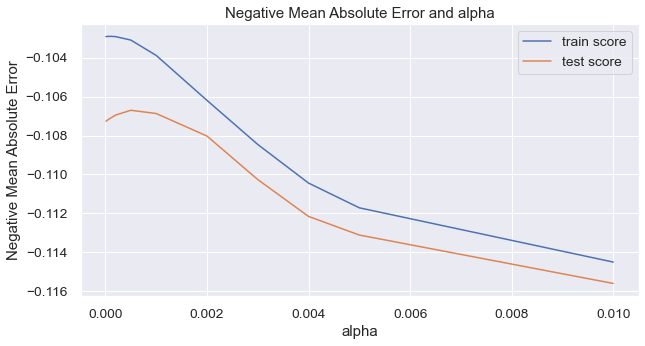

In [162]:
plt.figure(figsize=(10,5))
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [163]:
#Fitting the model with optimal value of alpha
alpha =0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe1, y_train) 

Lasso(alpha=0.0005)

In [164]:
lasso.coef_

array([ 0.20388108,  0.20330877,  0.14703239,  0.13095172,  0.12107732,
        0.13483358,  0.12679999,  0.09370009,  0.0913967 ,  0.0713374 ,
        0.07806287,  0.05614394, -0.09056082, -0.11444624, -0.89374603])

In [165]:
#Double the value of alpha
alpha =0.001
lasso_dbl = Lasso(alpha=alpha)       
lasso_dbl.fit(X_train_rfe1, y_train) 
lasso_dbl.coef_

array([ 0.19876209,  0.2065435 ,  0.13218624,  0.12987793,  0.11557468,
        0.11991698,  0.0926828 ,  0.08527541,  0.06947715,  0.06073053,
        0.026435  ,  0.00999536, -0.07681552, -0.11651086, -0.31708348])

In [166]:
#Printing Features and Coefficient for the Optimal Alpha value
LassoDF= pd.DataFrame({
     'Features':X_train_rfe1.columns,
    'Coeffecient':lasso.coef_,
    'abs':np.abs(lasso.coef_)
}).round(decimals=3).sort_values('abs',ascending=False).style.bar(color=['grey','lightblue'],align='zero')
LassoDF

,Features,Coeffecient,abs
14,Condition2_PosN,-0.894000,0.894000
0,TotalArea,0.204000,0.204000
1,OverallQual,0.203000,0.203000
2,Neighborhood_Crawfor,0.147000,0.147000
5,MSZoning_FV,0.135000,0.135000
3,MSZoning_RL,0.131000,0.131000
6,Neighborhood_ClearCr,0.127000,0.127000
4,CentralAir,0.121000,0.121000
13,YearRemodAddAge,-0.114000,0.114000
7,Exterior1st_BrkFace,0.094000,0.094000


In [167]:
#Printing Features and Coefficient for the Double Alpha value
LassoDF1= pd.DataFrame({
     'Features':X_train_rfe1.columns,
    'Coeffecient':lasso_dbl.coef_,
    'abs':np.abs(lasso_dbl.coef_)
}).round(decimals=3).sort_values('abs',ascending=False).style.bar(color=['grey','lightblue'],align='zero')
LassoDF1

,Features,Coeffecient,abs
14,Condition2_PosN,-0.317000,0.317000
1,OverallQual,0.207000,0.207000
0,TotalArea,0.199000,0.199000
2,Neighborhood_Crawfor,0.132000,0.132000
3,MSZoning_RL,0.130000,0.130000
5,MSZoning_FV,0.120000,0.120000
13,YearRemodAddAge,-0.117000,0.117000
4,CentralAir,0.116000,0.116000
6,Neighborhood_ClearCr,0.093000,0.093000
7,Exterior1st_BrkFace,0.085000,0.085000


In [168]:
#Fit the train data
y_train_price_rfe = lasso.predict(X_train_rfe1)

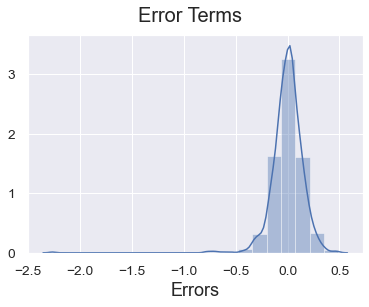

In [169]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [170]:
# calculate these metrics by hand for Training Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_train_price_rfe))
print('MSE:', metrics.mean_squared_error(y_train, y_train_price_rfe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_price_rfe)))

MAE: 0.10323811636672238
MSE: 0.023469410260896658
RMSE: 0.1531972919502713


In [171]:
#Check the R-2 Score on training
from sklearn.metrics import r2_score
r2_score(y_train, y_train_price_rfe)

0.8491623063978554

In [172]:
X_test_rfe1=X_test[X_train_rfe1.columns]

In [173]:
# Making predictions using the Lasso model

y_pred_rfe = lasso.predict(X_test_rfe1)

In [174]:
# calculate these metrics by hand for Testing Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rfe))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rfe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe)))

MAE: 0.10666132939563187
MSE: 0.02371450521224331
RMSE: 0.15399514671652256


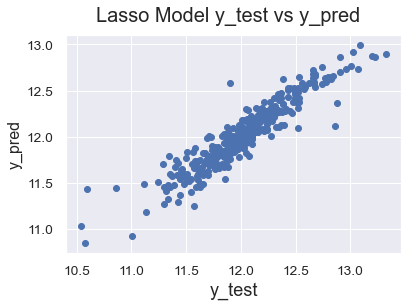

In [175]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_rfe)
fig.suptitle('Lasso Model y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     # Plotting y_test and y_pred to understand the spread
plt.show()

In [176]:
#Check the R-2 Score on testing dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rfe)

0.861341834840382

### Run Lasso Model again after removing 5 important predictors

In [177]:
lasso_imp_predictor=['Condition2_PosN','TotalArea','OverallQual','Neighborhood_Crawfor','MSZoning_FV']

In [178]:
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)

X_train:  (1095, 200)
X_test:  (365, 200)


In [179]:
X_train_lasso=X_train.drop(lasso_imp_predictor,axis=1)
X_test_lasso=X_test.drop(lasso_imp_predictor,axis=1)

In [180]:
print ('New X_train: ', X_train_lasso.shape)
print ('New X_test: ', X_test_lasso.shape)

New X_train:  (1095, 195)
New X_test:  (365, 195)


In [181]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train_lasso, y_train)

In [182]:
list(zip(X_train_lasso.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 146),
 ('LotArea', False, 145),
 ('Street', False, 132),
 ('LotShape', False, 116),
 ('LandSlope', False, 156),
 ('MasVnrArea', False, 148),
 ('ExterQual', False, 122),
 ('ExterCond', False, 147),
 ('BsmtQual', False, 94),
 ('BsmtCond', False, 14),
 ('BsmtExposure', False, 57),
 ('BsmtFinType1', False, 81),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 155),
 ('BsmtUnfSF', False, 124),
 ('TotalBsmtSF', False, 12),
 ('HeatingQC', False, 93),
 ('CentralAir', True, 1),
 ('2ndFlrSF', False, 97),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', False, 126),
 ('KitchenQual', True, 1),
 ('Functional', False, 47),
 ('Fireplaces', False, 77),
 ('FireplaceQu', False, 154),
 ('GarageFinish', False, 139),
 ('GarageCars', False, 117),
 ('GarageQual', False, 38),
 ('GarageCond', False, 109),
 ('PavedDrive', False, 123),
 ('WoodDeckSF', False, 108),
 ('OpenPorchSF', False, 157),
 ('ScreenPorch', False, 164),
 ('Fence', False, 104),
 ('LotFrontage_NAN', False, 152),
 ('MasVnrAre

In [183]:
col = X_train_lasso.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'CentralAir', 'GrLivArea', 'KitchenQual', 'YearBuiltAge',
       'Neighborhood_BrDale', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Condition1_RRNn', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Foundation_Stone', 'Foundation_Wood',
       'SaleCondition_Partial'],
      dtype='object')

In [184]:
X_train_lasso_rfe=X_train_lasso[col]

In [185]:
#Run Lasso Regression
lasso = Lasso()
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
#0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
#4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
params = {'alpha': [0.00001,0.00005,0.00009,0.0001,0.0002,0.0005, 0.001,0.002,0.003,0.004,0.005,0.01]}


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',
                        #scoring=list(['neg_mean_squared_error' , 'neg_mean_absolute_error', 'r2']) , 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso_rfe, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 9e-05, 0.0001, 0.0002, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [186]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.12258860643958096


In [187]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005644,0.001862,0.001953,0.000018,1e-05,{'alpha': 1e-05},-0.118789,-0.139460,-0.164504,-0.136838,-0.114396,-0.134797,0.017781,11,-0.110955,-0.112982,-0.109240,-0.109730,-0.111465,-0.110874,0.001325
1,0.007002,0.005039,0.002052,0.000134,5e-05,{'alpha': 5e-05},-0.118646,-0.137129,-0.162112,-0.135654,-0.115129,-0.133734,0.016699,10,-0.111678,-0.113364,-0.109533,-0.110242,-0.112099,-0.111383,0.001360
2,0.005467,0.001565,0.002066,0.000272,9e-05,{'alpha': 9e-05},-0.119024,-0.134855,-0.159736,-0.134273,-0.115905,-0.132759,0.015538,9,-0.112511,-0.113872,-0.109838,-0.110943,-0.112841,-0.112001,0.001433
3,0.009012,0.008285,0.001959,0.000102,0.0001,{'alpha': 0.0001},-0.119147,-0.134302,-0.159143,-0.133927,-0.116114,-0.132527,0.015244,8,-0.112761,-0.114030,-0.109923,-0.111121,-0.113057,-0.112178,0.001466
4,0.005711,0.001445,0.002088,0.000248,0.0002,{'alpha': 0.0002},-0.120657,-0.128887,-0.153156,-0.130478,-0.118562,-0.130348,0.012290,7,-0.115490,-0.115775,-0.110741,-0.112965,-0.115702,-0.114134,0.001993
5,0.003143,0.000283,0.002168,0.000606,0.0005,{'alpha': 0.0005},-0.122857,-0.115619,-0.135422,-0.124755,-0.122531,-0.124237,0.006395,3,-0.120599,-0.122312,-0.113217,-0.117444,-0.121245,-0.118963,0.003299
6,0.003457,0.001381,0.002067,0.000797,0.001,{'alpha': 0.001},-0.122568,-0.114951,-0.131164,-0.121459,-0.122801,-0.122589,0.005161,1,-0.121595,-0.123032,-0.114355,-0.118878,-0.121906,-0.119953,0.003114
7,0.002705,0.000505,0.001591,0.000251,0.002,{'alpha': 0.002},-0.123836,-0.116788,-0.133073,-0.121348,-0.124643,-0.123938,0.005325,2,-0.123530,-0.124842,-0.116538,-0.121470,-0.124330,-0.122142,0.003029
8,0.002818,0.000280,0.001772,0.000237,0.003,{'alpha': 0.003},-0.125036,-0.117960,-0.133560,-0.123385,-0.127180,-0.125424,0.005085,4,-0.124813,-0.126619,-0.118225,-0.123330,-0.126414,-0.123880,0.003068
9,0.003396,0.000880,0.001626,0.000067,0.004,{'alpha': 0.004},-0.126389,-0.119580,-0.134606,-0.125524,-0.129758,-0.127172,0.004958,5,-0.126653,-0.128492,-0.120406,-0.125159,-0.128580,-0.125858,0.003006


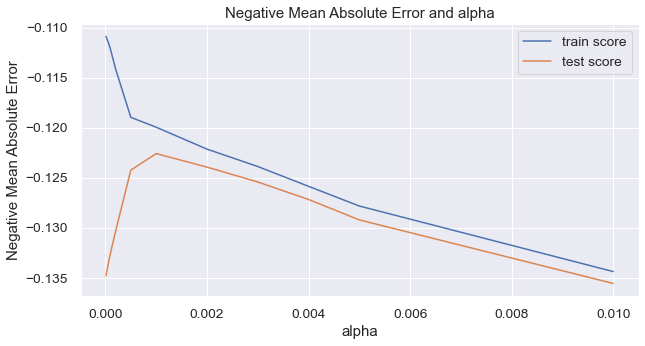

In [188]:
plt.figure(figsize=(10,5))
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [189]:
alpha =0.001

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train_lasso_rfe, y_train) 

Lasso(alpha=0.001)

In [190]:
lasso_new.coef_

array([ 0.06272734,  0.13652401,  0.22911043,  0.12533428, -0.17744295,
       -0.09762151, -0.13952411, -0.11764205, -0.15727154,  0.        ,
        0.        ,  0.02658532,  0.        , -0.        ,  0.        ,
       -0.13034068, -0.1434024 ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.08623738,  0.        , -0.        ,  0.0616015 ])

In [191]:
LassoDF= pd.DataFrame({
     'Features':X_train_lasso_rfe.columns,
    'Coeffecient':lasso_new.coef_
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')
LassoDF

,Features,Coeffecient
2,GrLivArea,0.230000
1,CentralAir,0.140000
3,KitchenQual,0.130000
26,Exterior1st_BrkFace,0.090000
0,BsmtFinSF1,0.060000
29,SaleCondition_Partial,0.060000
11,Condition2_Norm,0.030000
18,RoofMatl_CompShg,0.000000
27,Foundation_Stone,0.000000
23,RoofMatl_WdShake,-0.000000


In [192]:
upd_cols=['GrLivArea','CentralAir','KitchenQual','Exterior1st_BrkFace','BsmtFinSF1','SaleCondition_Partial',
          'Condition2_Norm','Neighborhood_BrDale','Neighborhood_IDOTRR','BldgType_Duplex',
          'BldgType_Twnhs','Neighborhood_Edwards','Neighborhood_MeadowV','YearBuiltAge']
X_train_lasso_rfe1=X_train_lasso_rfe[upd_cols]


In [193]:
#Hyperparameter Tuning
params = {'alpha': [0.00001, 0.00005, 0.0001,0.0002,0.0005, 0.001,0.002,0.003,0.004,0.005]}


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',
                        #scoring=list(['neg_mean_squared_error' , 'neg_mean_absolute_error', 'r2']) , 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso_rfe1, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0005, 0.001,
                                   0.002, 0.003, 0.004, 0.005]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0005}
-0.12204968548398562


In [195]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002848,0.000484,0.001840,0.000091,1e-05,{'alpha': 1e-05},-0.122608,-0.116098,-0.129699,-0.121068,-0.122114,-0.122317,0.004356,6,-0.121822,-0.123200,-0.114623,-0.118681,-0.121636,-0.119992,0.003062
1,0.003905,0.001848,0.002401,0.000949,5e-05,{'alpha': 5e-05},-0.122582,-0.115977,-0.129642,-0.121025,-0.122132,-0.122271,0.004373,4,-0.121761,-0.123153,-0.114579,-0.118655,-0.121602,-0.119950,0.003059
2,0.003296,0.000749,0.001892,0.000274,0.0001,{'alpha': 0.0001},-0.122549,-0.115826,-0.129627,-0.120969,-0.122154,-0.122225,0.004414,3,-0.121697,-0.123093,-0.114536,-0.118627,-0.121570,-0.119905,0.003053
3,0.002752,0.000379,0.001589,0.000161,0.0002,{'alpha': 0.0002},-0.122487,-0.115554,-0.129613,-0.120860,-0.122201,-0.122143,0.004494,2,-0.121612,-0.122977,-0.114467,-0.118581,-0.121510,-0.119830,0.003041
4,0.002482,0.000170,0.001483,0.000091,0.0005,{'alpha': 0.0005},-0.122414,-0.114957,-0.129928,-0.120567,-0.122382,-0.122050,0.004792,1,-0.121505,-0.122890,-0.114332,-0.118609,-0.121507,-0.119769,0.003056
5,0.003071,0.001204,0.002770,0.001375,0.001,{'alpha': 0.001},-0.122554,-0.114890,-0.130852,-0.120297,-0.122777,-0.122274,0.005145,5,-0.121703,-0.123146,-0.114536,-0.119222,-0.121902,-0.120102,0.003060
6,0.002817,0.000785,0.002040,0.001324,0.002,{'alpha': 0.002},-0.123837,-0.116789,-0.133073,-0.121348,-0.124643,-0.123938,0.005325,7,-0.123530,-0.124842,-0.116538,-0.121470,-0.124330,-0.122142,0.003028
7,0.003274,0.001849,0.001471,0.000063,0.003,{'alpha': 0.003},-0.125036,-0.117961,-0.133559,-0.123385,-0.127180,-0.125424,0.005085,8,-0.124813,-0.126620,-0.118225,-0.123330,-0.126414,-0.123880,0.003068
8,0.002436,0.000155,0.001618,0.000216,0.004,{'alpha': 0.004},-0.126387,-0.119580,-0.134606,-0.125525,-0.129759,-0.127172,0.004958,9,-0.126652,-0.128492,-0.120406,-0.125160,-0.128581,-0.125858,0.003006
9,0.002925,0.000710,0.001858,0.000557,0.005,{'alpha': 0.005},-0.127308,-0.121686,-0.136513,-0.128155,-0.132406,-0.129213,0.004998,10,-0.128457,-0.130662,-0.122533,-0.127086,-0.130388,-0.127825,0.002952


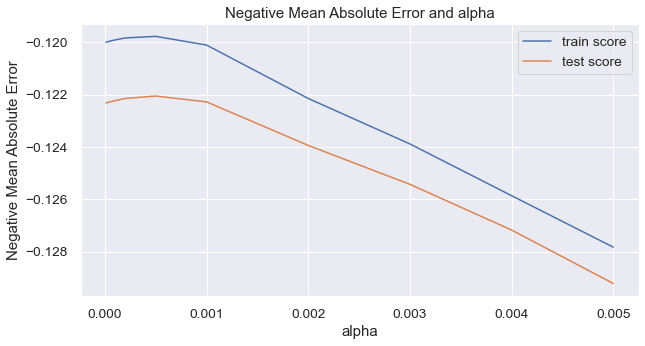

In [196]:
plt.figure(figsize=(10,5))
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [197]:
alpha =0.0005

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train_lasso_rfe1, y_train) 

Lasso(alpha=0.0005)

In [198]:
lasso_new.coef_

array([ 0.22875386,  0.14225478,  0.12268309,  0.10138481,  0.06338225,
        0.07060351,  0.06884987, -0.15482979, -0.13846896, -0.1425875 ,
       -0.13368543, -0.14874228, -0.22705648, -0.17513375])

In [199]:
LassoDF_new= pd.DataFrame({
     'Features':X_train_lasso_rfe1.columns,
    'Coeffecient':lasso_new.coef_,
    'abs':np.abs(lasso_new.coef_)
}).round(decimals=2).sort_values('abs',ascending=False).style.bar(color=['grey','lightblue'],align='zero')
LassoDF_new

,Features,Coeffecient,abs
0,GrLivArea,0.230000,0.230000
12,Neighborhood_MeadowV,-0.230000,0.230000
13,YearBuiltAge,-0.180000,0.180000
7,Neighborhood_BrDale,-0.150000,0.150000
11,Neighborhood_Edwards,-0.150000,0.150000
1,CentralAir,0.140000,0.140000
8,Neighborhood_IDOTRR,-0.140000,0.140000
9,BldgType_Duplex,-0.140000,0.140000
10,BldgType_Twnhs,-0.130000,0.130000
2,KitchenQual,0.120000,0.120000


<a id=section803></a>
### 8.3 Elastic Net

In [200]:
#Run ElasticNet Model
elasticnet = ElasticNet()
params = {'alpha': [0.0001,0.0002,0.0005, 0.001,0.002,0.003,0.005,0.01,0.02],
         'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}



# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.003,
                                   0.005, 0.01, 0.02],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [201]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001, 'l1_ratio': 0.8}
-0.10692160765431169


In [202]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[cv_results.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
37,0.002516,0.000095,0.001439,0.000064,0.001,0.8,"{'alpha': 0.001, 'l1_ratio': 0.8}",-0.099708,-0.108079,-0.118026,-0.104021,-0.104774,-0.106922,0.00616,1,-0.106451,-0.104147,-0.096722,-0.104526,-0.10612,-0.103593,0.003548


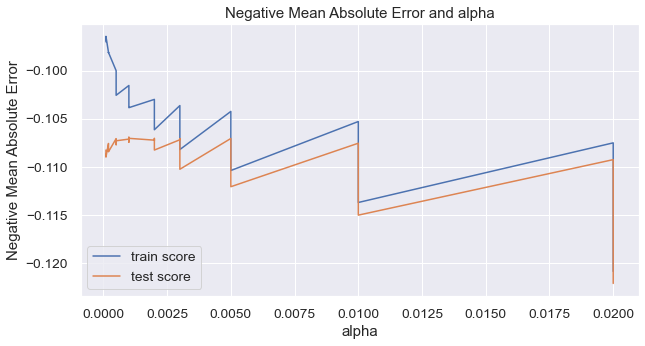

In [203]:
plt.figure(figsize=(10, 5))

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')


# plotting
plt.plot((cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot((cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower left')


plt.show()

In [204]:
#Run the ElasticNet Model with optimal alpha and l1-ratio
alpha = 0.001
l1_ratio=0.8

elasticnet = ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
        
elasticnet.fit(X_train_rfe, y_train) 

ElasticNet(alpha=0.001, l1_ratio=0.8)

In [205]:
elasticnet.coef_

array([ 0.20572149,  0.11799566,  0.19983334, -0.11575474,  0.12681641,
        0.02284788,  0.1319894 , -0.        ,  0.10529682,  0.13700338,
        0.04608174, -0.4453734 , -0.08127393,  0.02680103,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.0885564 ,  0.        , -0.        ,  0.        ,
        0.06535965,  0.07763282,  0.        ,  0.        ,  0.        ])

In [206]:
pd.DataFrame({
     'Features':X_train_rfe.columns,
    'Coeffecient':elasticnet.coef_
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')


,Features,Coeffecient
0,OverallQual,0.210000
2,TotalArea,0.200000
9,Neighborhood_Crawfor,0.140000
4,MSZoning_FV,0.130000
6,MSZoning_RL,0.130000
1,CentralAir,0.120000
8,Neighborhood_ClearCr,0.110000
21,Exterior1st_BrkFace,0.090000
26,SaleCondition_Partial,0.080000
25,SaleCondition_Normal,0.070000


In [207]:
upd_cols=['TotalArea','OverallQual','Neighborhood_Crawfor','MSZoning_RL','CentralAir','MSZoning_FV',
          'Neighborhood_ClearCr','Exterior1st_BrkFace','SaleCondition_Partial','SaleCondition_Normal',
          'Neighborhood_Veenker','RoofMatl_CompShg','MSZoning_RH','BldgType_Twnhs','YearRemodAddAge',
          'Condition2_PosN']
X_train_rfe1=X_train_rfe[upd_cols]

In [208]:
#Run elasticnet again after updating features
elasticnet = ElasticNet()
params = {'alpha': [ 0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.05],
         'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}



# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe1, y_train) 

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03,
                                   0.05],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [209]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001, 'l1_ratio': 0.7}
-0.10671842921043048


In [210]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[cv_results.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.002803,0.000873,0.001707,0.000361,0.001,0.7,"{'alpha': 0.001, 'l1_ratio': 0.7}",-0.099708,-0.107902,-0.118143,-0.103719,-0.10412,-0.106718,0.006274,1,-0.106312,-0.104102,-0.096687,-0.104525,-0.105849,-0.103495,0.0035


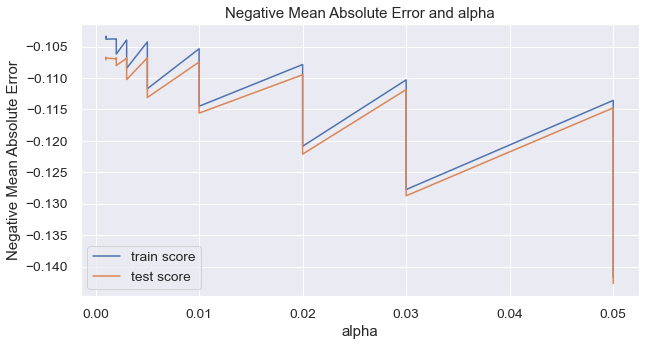

In [211]:
plt.figure(figsize=(10, 5))

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')


# plotting
plt.plot((cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot((cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower left')


plt.show()

In [212]:
#Run ElasticNet with optimal alpha and l1_ratio
alpha = 0.001
l1_ratio=0.7

elasticnet = ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
        
elasticnet.fit(X_train_rfe1, y_train) 

ElasticNet(alpha=0.001, l1_ratio=0.7)

In [213]:
elasticnet.coef_

array([ 0.20024249,  0.20537089,  0.13943784,  0.13296659,  0.11920069,
        0.1302027 ,  0.11148554,  0.09023122,  0.08146876,  0.06760604,
        0.05560115,  0.03488715,  0.03277473, -0.08360009, -0.11540914,
       -0.49315371])

In [214]:
pd.DataFrame({
     'Features':X_train_rfe1.columns,
    'Coeffecient':elasticnet.coef_
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')


,Features,Coeffecient
1,OverallQual,0.210000
0,TotalArea,0.200000
2,Neighborhood_Crawfor,0.140000
3,MSZoning_RL,0.130000
5,MSZoning_FV,0.130000
4,CentralAir,0.120000
6,Neighborhood_ClearCr,0.110000
7,Exterior1st_BrkFace,0.090000
8,SaleCondition_Partial,0.080000
9,SaleCondition_Normal,0.070000


In [215]:
#Predict the price on train data
y_train_price_rfe = elasticnet.predict(X_train_rfe1)

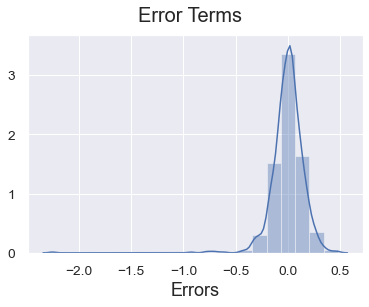

In [216]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [217]:
# calculate these metrics by hand for Training Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_train_price_rfe))
print('MSE:', metrics.mean_squared_error(y_train, y_train_price_rfe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_price_rfe)))

MAE: 0.10371303619803793
MSE: 0.024067344850543928
RMSE: 0.15513653615619993


In [218]:
#Check the R-2 Score on training
from sklearn.metrics import r2_score
r2_score(y_train, y_train_price_rfe)

0.8453193860421782

In [219]:
X_test_rfe1=X_test[upd_cols]

In [220]:
# Making predictions using the ElasticNet model

y_pred_rfe = elasticnet.predict(X_test_rfe1)

In [221]:
# calculate these metrics by hand for Testing Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rfe))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rfe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe)))

MAE: 0.1061592117727445
MSE: 0.022666340332008355
RMSE: 0.15055344676229884


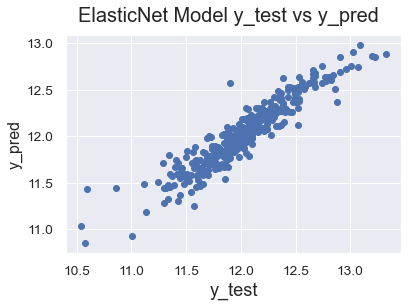

In [222]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_rfe)
fig.suptitle('ElasticNet Model y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     # Plotting y_test and y_pred to understand the spread
plt.show()

In [223]:
#Check the R-2 Score on testing dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rfe)

0.8674704307262069

<a id=section804></a>
### 8.4 Model Comparison

After running RFE and selecting top 30 features, we were able to generate regularized models that could present good generalization and better performance. <br>
Now we have ran our model with different Regularized models. Let's compare the results <br>

| Features   | Ridge Model | Lasso Model | ElasticNet Model|
| ------------- | :-----------------------|:---------------|:----------------- :|
| Total Variables   | 29         | 15 | 16|
| Train R-squared          | 0.842       | 0.849|0.845                              | 
| Test R-squared | 0.867       |  0.861|0.867|
| Alpha Value | 9       |  0.0005|0.001|
| RMSE(train data)  | 0.156        |    0.153|0.155                                     | 
| MAE(train data) |   0.103      |0.103|    0.103 |
|MSE(train data)  |   0.024           |0.023         | 0.024|
| RMSE(test data)  | 0.150        |    0.153|0.150                                     | 
| MAE(test data) |   0.105      |0.106               |0.106 |
|MSE(test data)  |   0.022           |0.023         | 0.022|

- All the above regularized models performs well and we see no underfitting and overfitting issues. 
- All the models scores __similiar R-Square and RMSE/MSE/MAE__ scores.
- __Lasso and Elastic Net__ model performs feature reduction which makes the model simpler in comparison to Ridge model.
- __Lasso Model__ has the lowest number of features among all three models which makes it the most preferred choice for our problem statement.
- __Elastic Net__ returns similiar model accuracy and results to Lasso but is more computationally expensive which is why Lasso is preferred over Elastic Net.

<div class="alert alert-block alert-success">
<h2>The model with Lasso (L1 Regularization) turns out to be the best model for our dataset</h2>
</div>

__Overall we have a decent model but we also acknowledge that we could still do better.__ 

Below are the few areas where we could improve our Model:
1. Reduce Cardinalities by clubbing similar items under Nominal Categorical Attributes.
2. Try different encoding techniques like Target encoding, Bayesian Target encoding etc..
3. Variable transformations like Principal component analysis 
4. More sophisticated Feature Selection Techniques required
5. Use Automatic Outlier removal techniques to boost the model like IsloationForest

<a id=section11></a>
##  __CONCLUSION__ 

Now lets look back at the problem statments and answers which needs to be provided to the customer/business.
<br>
- Essentially, the company wants:

  - To identify the variables which are significant in predicting the price of a house e.g., area, number of rooms, bathrooms, etc.
  - To know the accuracy of the model, i.e. how well do these variables predict the house prices

The model provides insights based on the House Properties Dataset and here are the recommendations/answers provided based on the choosen model above (Lasso Model):



### To identify the variables affecting house prices :
- We are very confident about some relationship between the probability of raising prices and below are listed based on the ranks of their impact
  - Total area of the Property
  - Overall material and finish quality
  - Neighborhood especially Crawfor, ClearCr, Veenker
  - Zoning classification especially Floating Village Residential, Residential Low Density
  - Having Central air conditioning
  - Exterior covering on house especially Brick Face
  - Having a good walkout or garden level basement walls
  - Condition of Sale especially Partial and Normal
  - Roof material especially Standard (Composite) Shingle
  
  <br>
            
- Some Relationship cause decline in Saleprices and below are the following:
  - Proximity to various conditions
  - Remodelling Time Duration
  - Townhouse End Unit Building Type

    
    
### To know the accuracy of the model
- The model has R-Square value of .849 which means it explains __~85%__ of the variance in the data 
- The model has testing R- Square value of .861 __(86.1%)__ which is very close to the training R-Square which means the model is generalisable and will predict accurately on the unforseen data.
- The errors are __normally distributed__ and follows __homoscedasticity__ and the errors (RMSE/MAE/MSE) does not vary much between Training and Testing dataset which __confirms the model__ is __not underfitting or overfitting__.
    
  